In [1]:
# Import basic libraries 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
sb.set()

%matplotlib inline

In [2]:
# Import and view dataset
hmDF = pd.read_csv('horror_movies.csv')
display(hmDF.head())
hmDF.shape

,id,original_title,title,original_language,overview,tagline,release_date,poster_path,popularity,vote_count,vote_average,budget,revenue,runtime,status,adult,backdrop_path,genre_names,collection,collection_name
0,760161,Orphan: First Kill,Orphan: First Kill,en,After escaping from an Estonian psychiatric fa...,There's always been something wrong with Esther.,2022-07-27,/pHkKbIRoCe7zIFvqan9LFSaQAde.jpg,5088.584,902,6.9,0,9572765,99,Released,False,/5GA3vV1aWWHTSDO5eno8V5zDo8r.jpg,"Horror, Thriller",760193.0,Orphan Collection
1,760741,Beast,Beast,en,A recently widowed man and his two teenage dau...,Fight for family.,2022-08-11,/xIGr7UHsKf0URWmyyd5qFMAq4d8.jpg,2172.338,584,7.1,0,56000000,93,Released,False,/2k9tBql5GYH328Krj66tDT9LtFZ.jpg,"Adventure, Drama, Horror",NaN,NaN
2,882598,Smile,Smile,en,"After witnessing a bizarre, traumatic incident...","Once you see it, it’s too late.",2022-09-23,/hiaeZKzwsk4y4atFhmncO5KRxeT.jpg,1863.628,114,6.8,17000000,45000000,115,Released,False,/mVNPfpydornVe4H4UCIk7WevWjf.jpg,"Horror, Mystery, Thriller",NaN,NaN
3,756999,The Black Phone,The Black Phone,en,"Finney Blake, a shy but clever 13-year-old boy...",Never talk to strangers.,2022-06-22,/lr11mCT85T1JanlgjMuhs9nMht4.jpg,1071.398,2736,7.9,18800000,161000000,103,Released,False,/AfvIjhDu9p64jKcmohS4hsPG95Q.jpg,"Horror, Thriller",NaN,NaN
4,772450,Presencias,Presences,es,A man who loses his wife and goes to seclude h...,NaN,2022-09-07,/dgDT3uol3mdvwEg0jt1ble3l9hw.jpg,1020.995,83,7.0,0,0,0,Released,False,/ojfzhdwRemcDt1I6pao6vVLw9AA.jpg,Horror,NaN,NaN


(32540, 20)

### Problem Statement
### How well can we predict the vote average score of this horror movie dataset?

In [3]:
# Visualize and explore the statistics of the dataset
hmDF.describe()

,id,popularity,vote_count,vote_average,budget,revenue,runtime,collection
count,3.254000e+04,32540.000000,32540.000000,32540.000000,3.254000e+04,3.254000e+04,32540.000000,2.306000e+03
mean,4.459108e+05,4.013456,62.691487,3.335728,5.431266e+05,1.349747e+06,62.142901,4.815349e+05
std,3.057447e+05,37.513472,420.887474,2.876002,4.542668e+06,1.443048e+07,40.998527,3.244982e+05
min,1.700000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,6.560000e+02
25%,1.464948e+05,0.600000,0.000000,0.000000,0.000000e+00,0.000000e+00,14.000000,1.554210e+05
50%,4.265210e+05,0.840000,2.000000,4.000000,0.000000e+00,0.000000e+00,80.000000,4.712590e+05
75%,7.075340e+05,2.243250,11.000000,5.700000,0.000000e+00,0.000000e+00,91.000000,7.590672e+05
max,1.033095e+06,5088.584000,16900.000000,10.000000,2.000000e+08,7.018426e+08,683.000000,1.033032e+06


In [4]:
for col in hmDF.columns:
    print(col)

id
original_title
title
original_language
overview
tagline
release_date
poster_path
popularity
vote_count
vote_average
budget
revenue
runtime
status
adult
backdrop_path
genre_names
collection
collection_name


In [5]:
# Based on the statistical description, we decide to remove some data points from the dataset
# 1. Remove data points with no 'overview' as we will be using them to predict 'vote_average'
# 2. Remove data points with no 'tagline' as we will be using them to predict 'vote_average'
# 3. Remove data points with zero 'vote_count' because it may cause our data to have large inaccuracy
# 4. Remove data points with zero 'runtime' because movies will a positive value of duration

### Data Preparation/ Data Cleaning

In [6]:
# Remove data points with no overview
hmDF = hmDF.dropna(subset='overview')
hmDF.shape

(31254, 20)

In [7]:
# Remove data points with no tagline
hmDF = hmDF.dropna(subset='tagline')
hmDF.shape

(12676, 20)

In [8]:
# Remove data points with zero vote count
hmDF = hmDF[(hmDF['vote_count'] > 0)]
hmDF.shape

(10046, 20)

In [9]:
# Remove data points with zero runtime
hmDF = hmDF[(hmDF['runtime'] > 0)]
hmDF.shape

(9890, 20)

In [10]:
# After some data cleaning, we are left with 9890 data points
# We proceed with further visualization of our data by plotting the countplot of each 'vote_average'
# This is to see if the data is skewed or having a large number of outliers
# Prevent our data to be biased and minimizing inaccuracy

[Text(0.5, 1.0, 'Vote_average Countplot')]

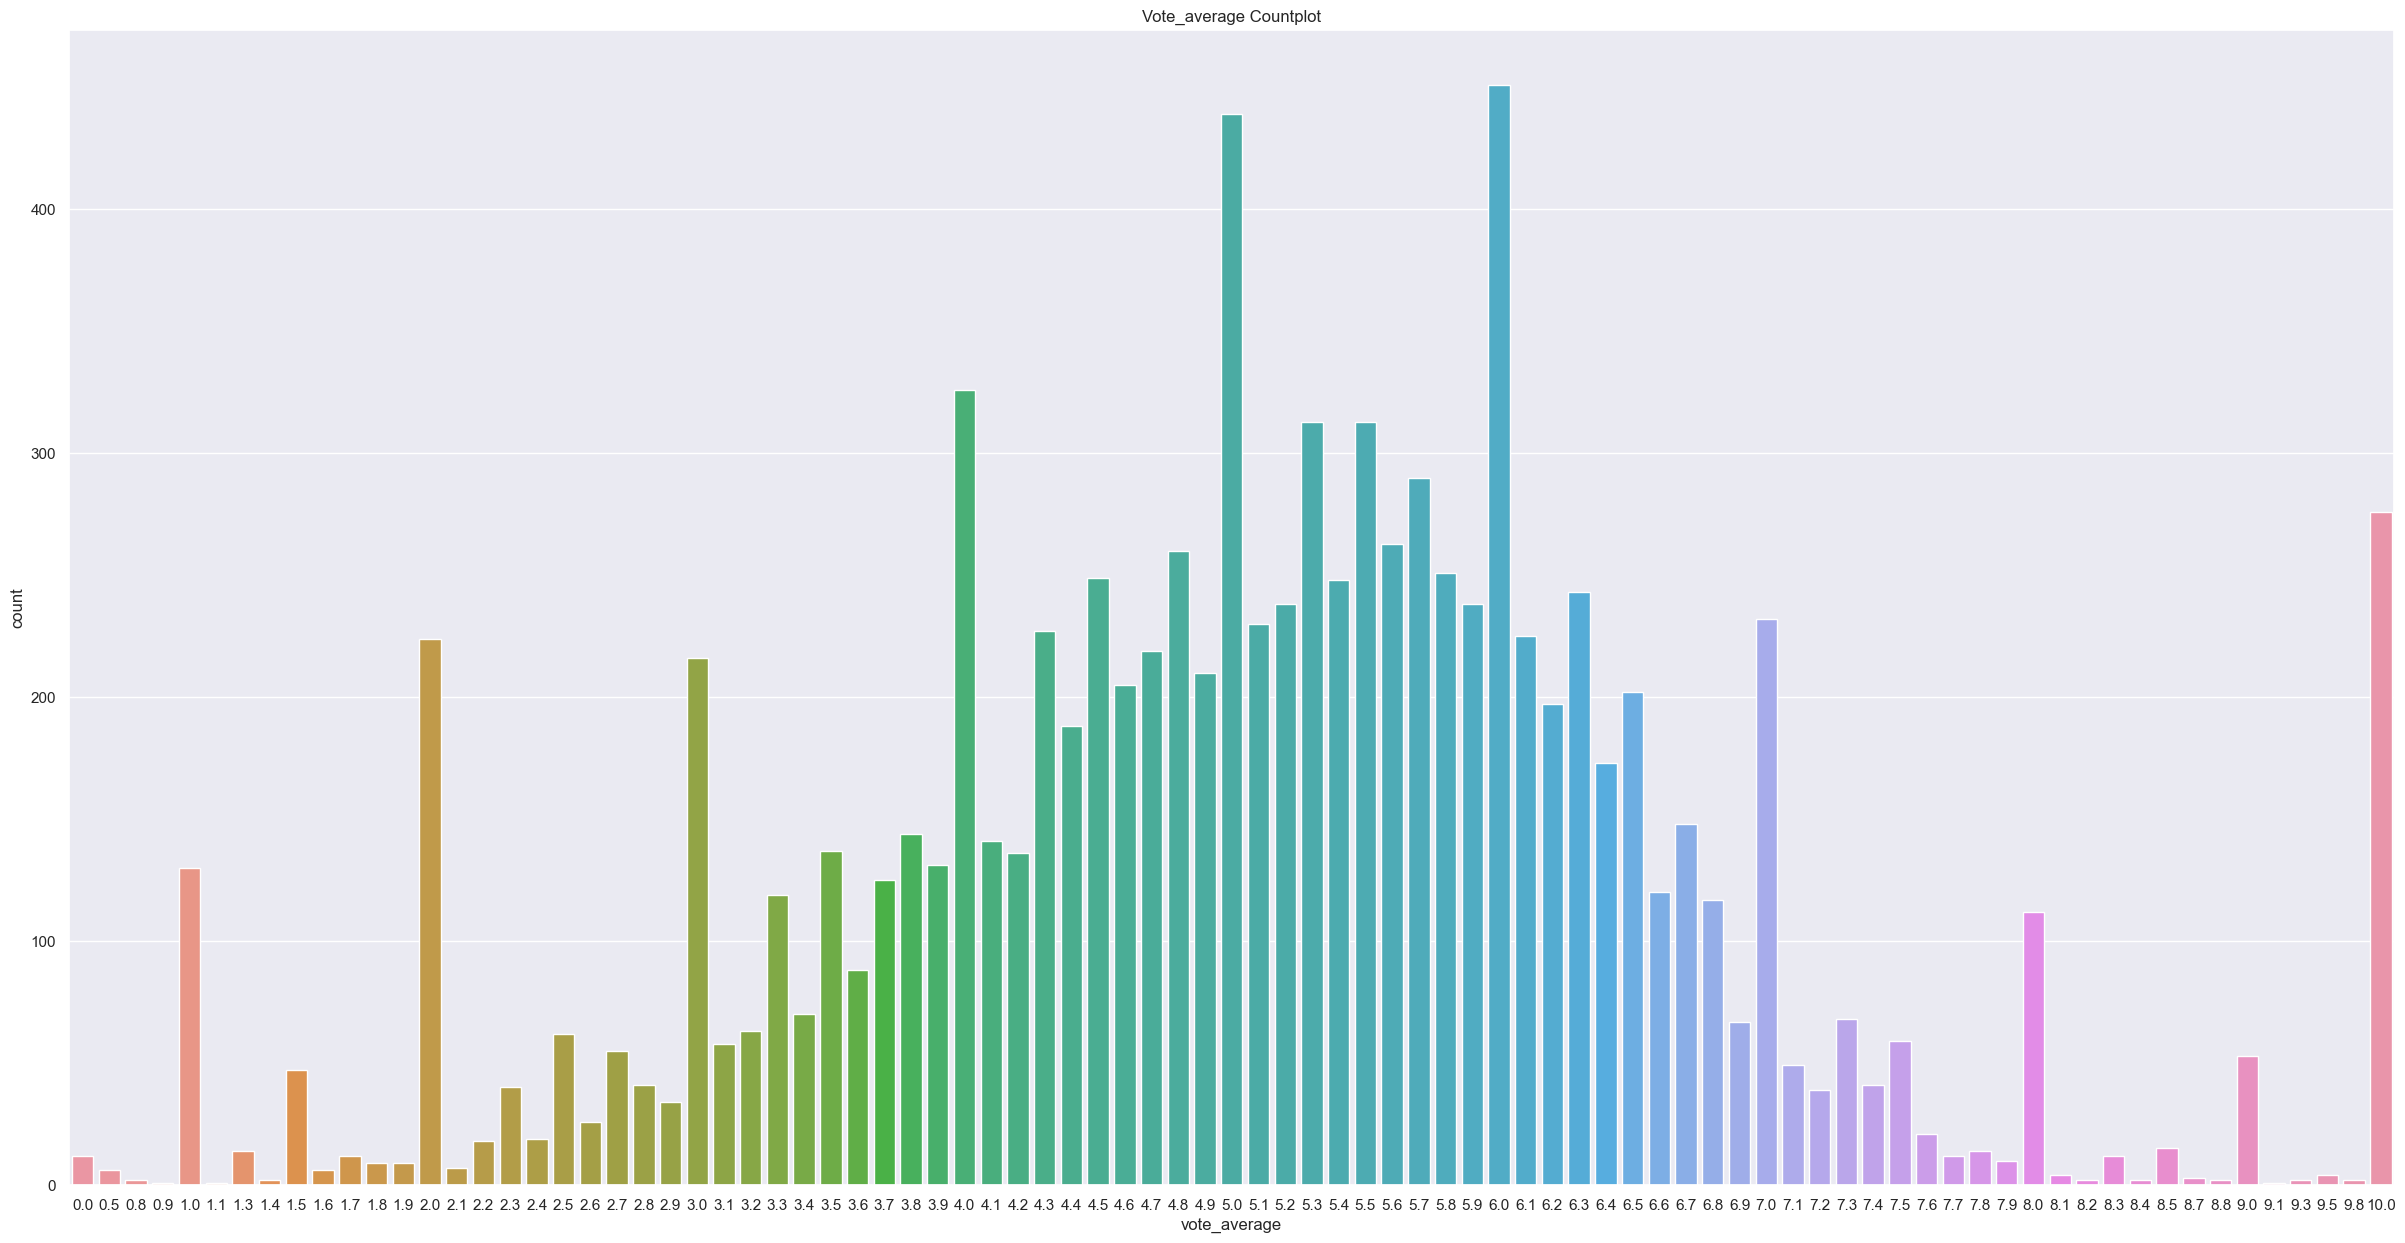

In [11]:
# Further Visualization of our Data
f = plt.figure(figsize = (30, 15))
sb.countplot(data = hmDF, x = 'vote_average').set(title = 'Vote_average Countplot')

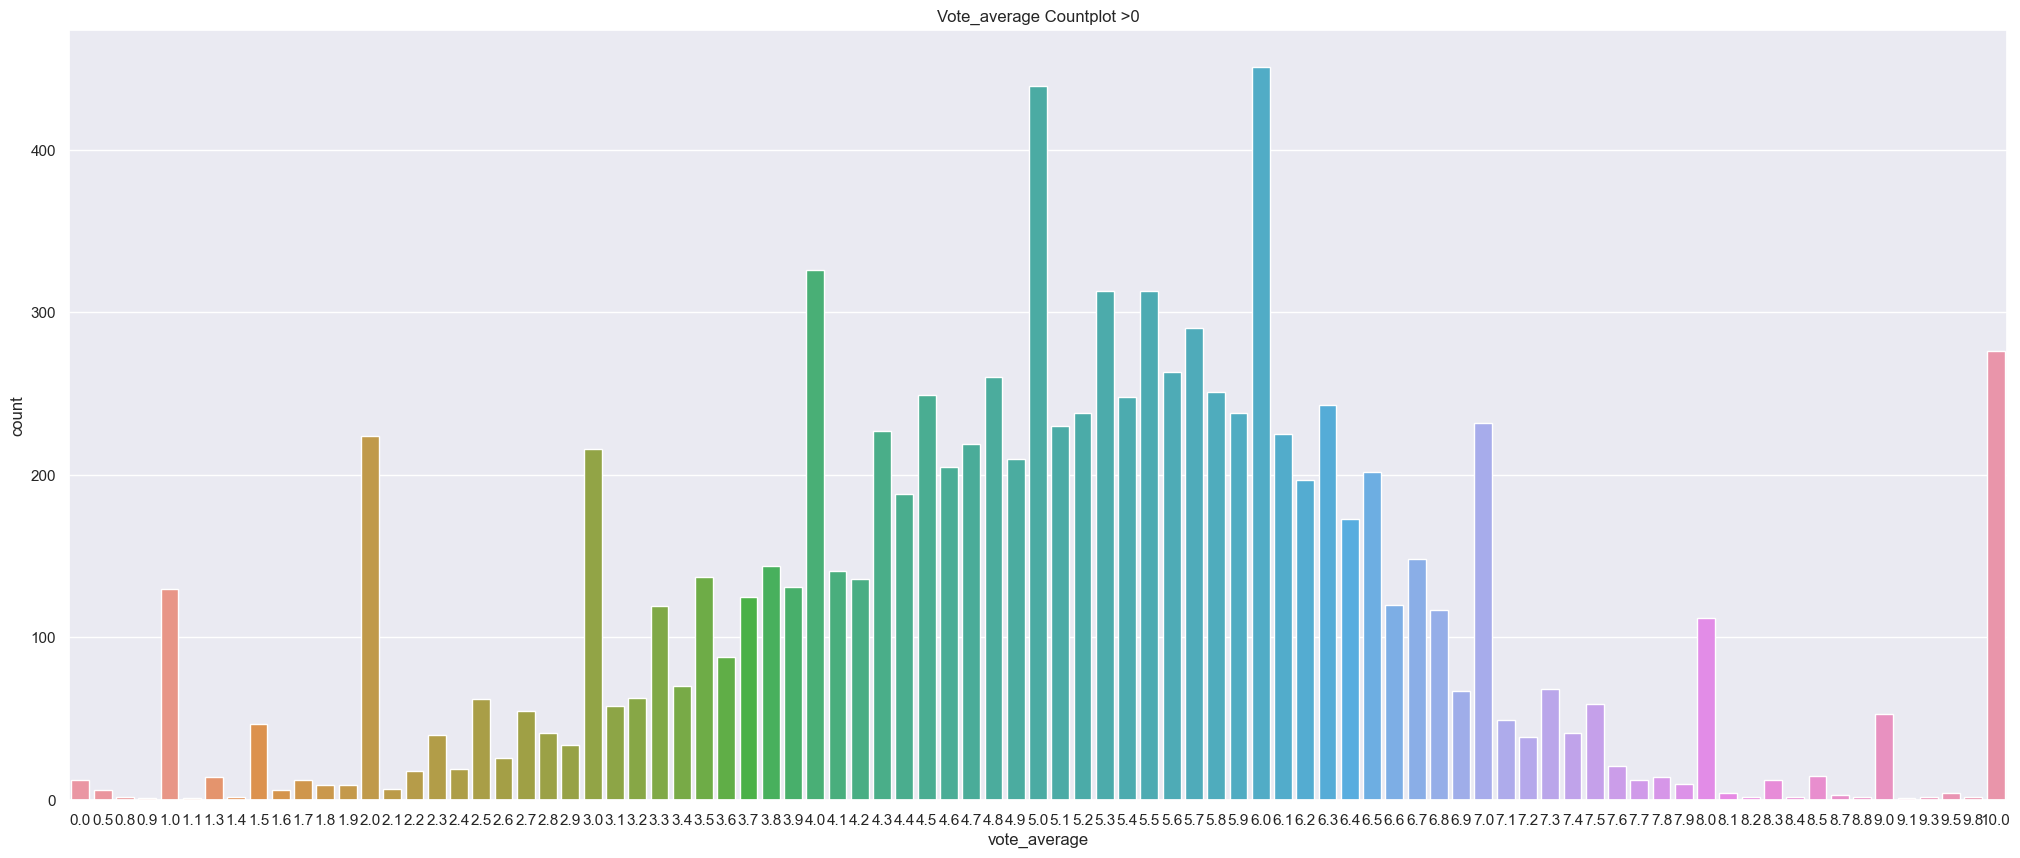

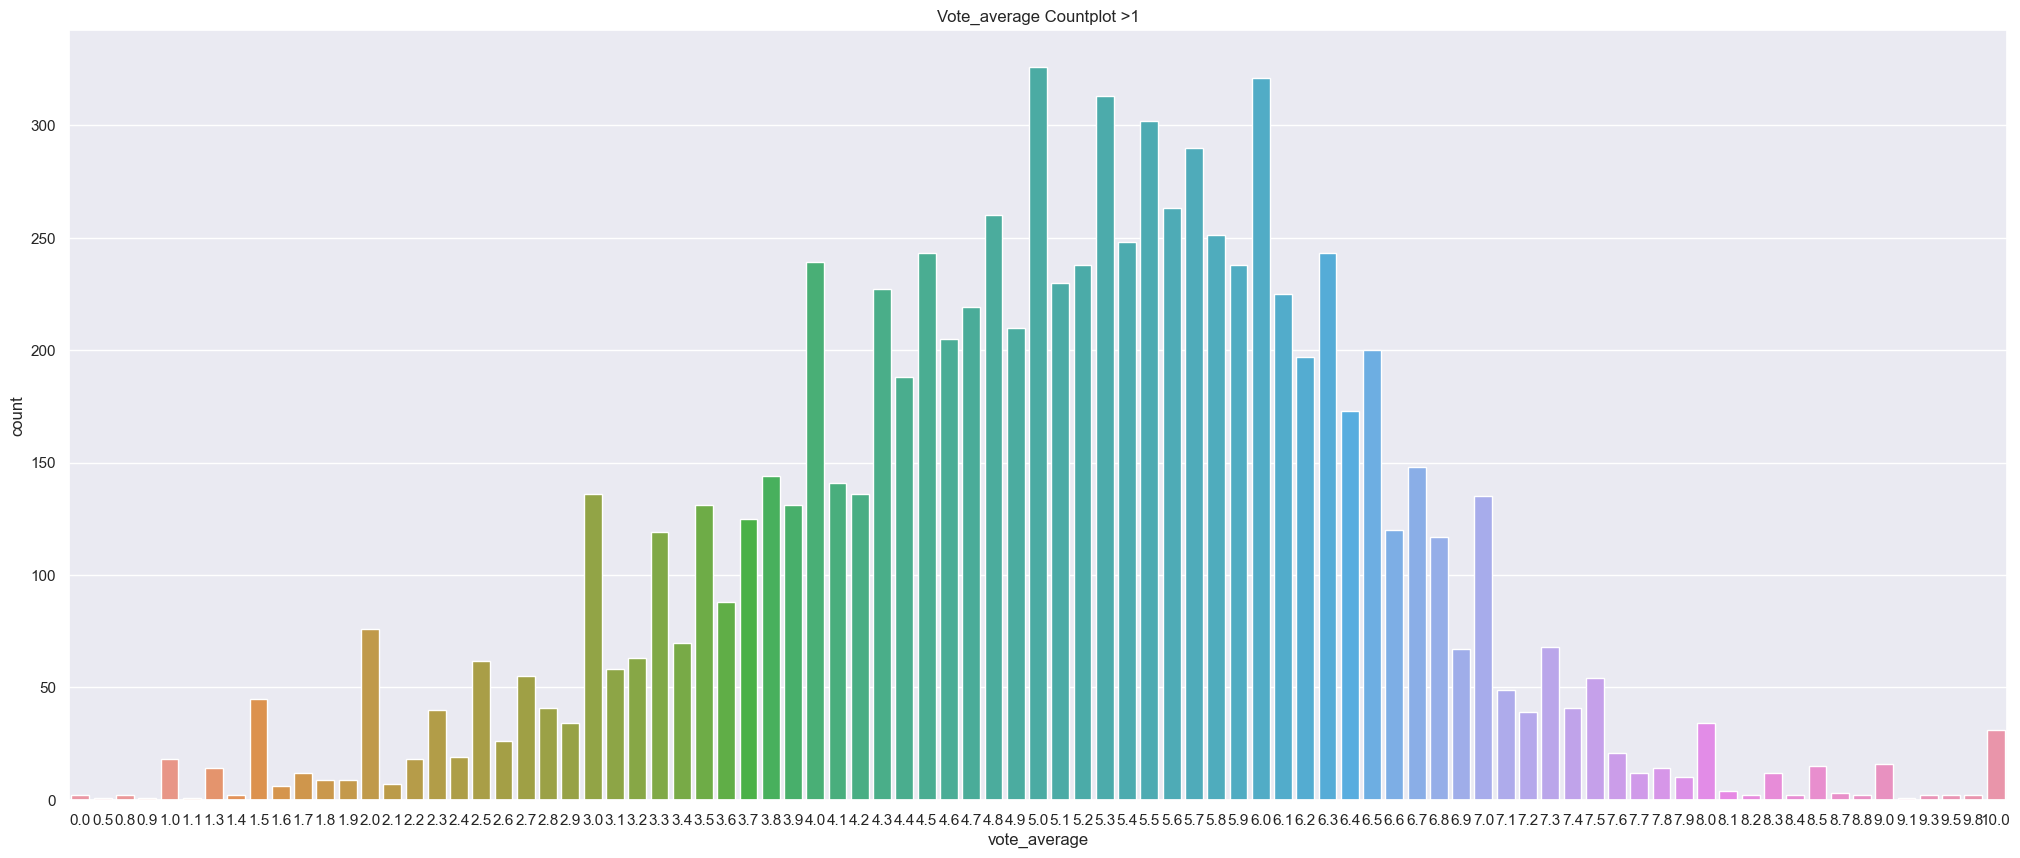

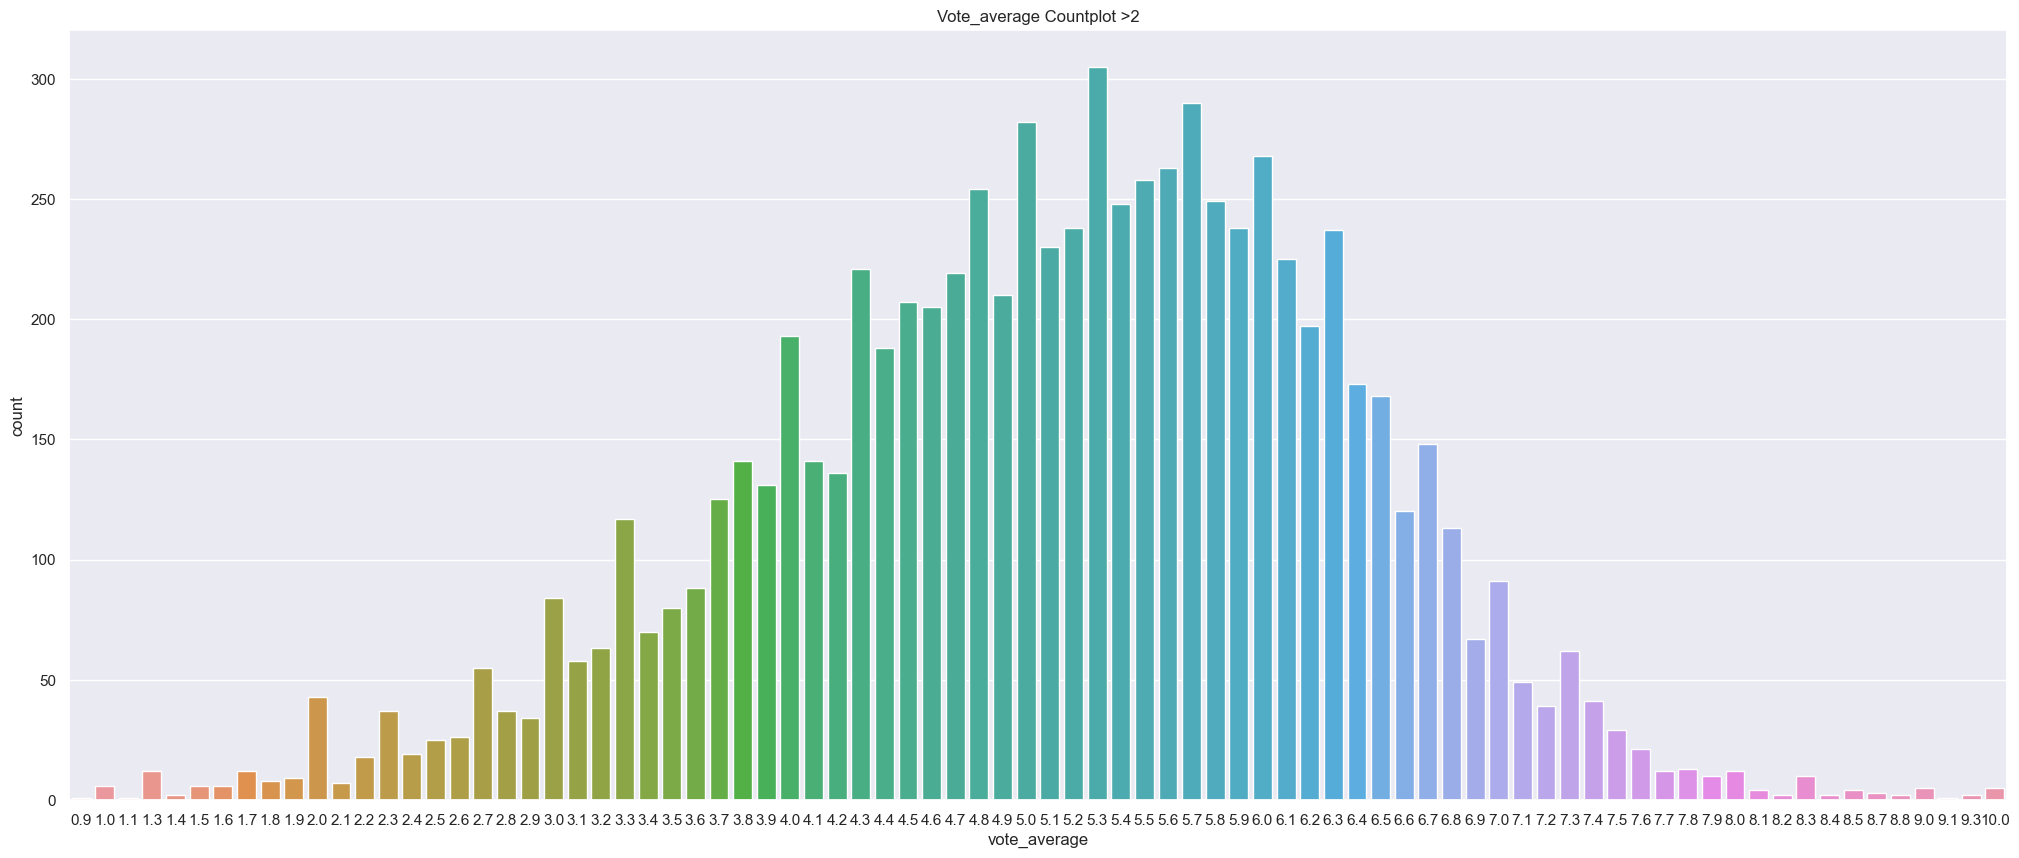

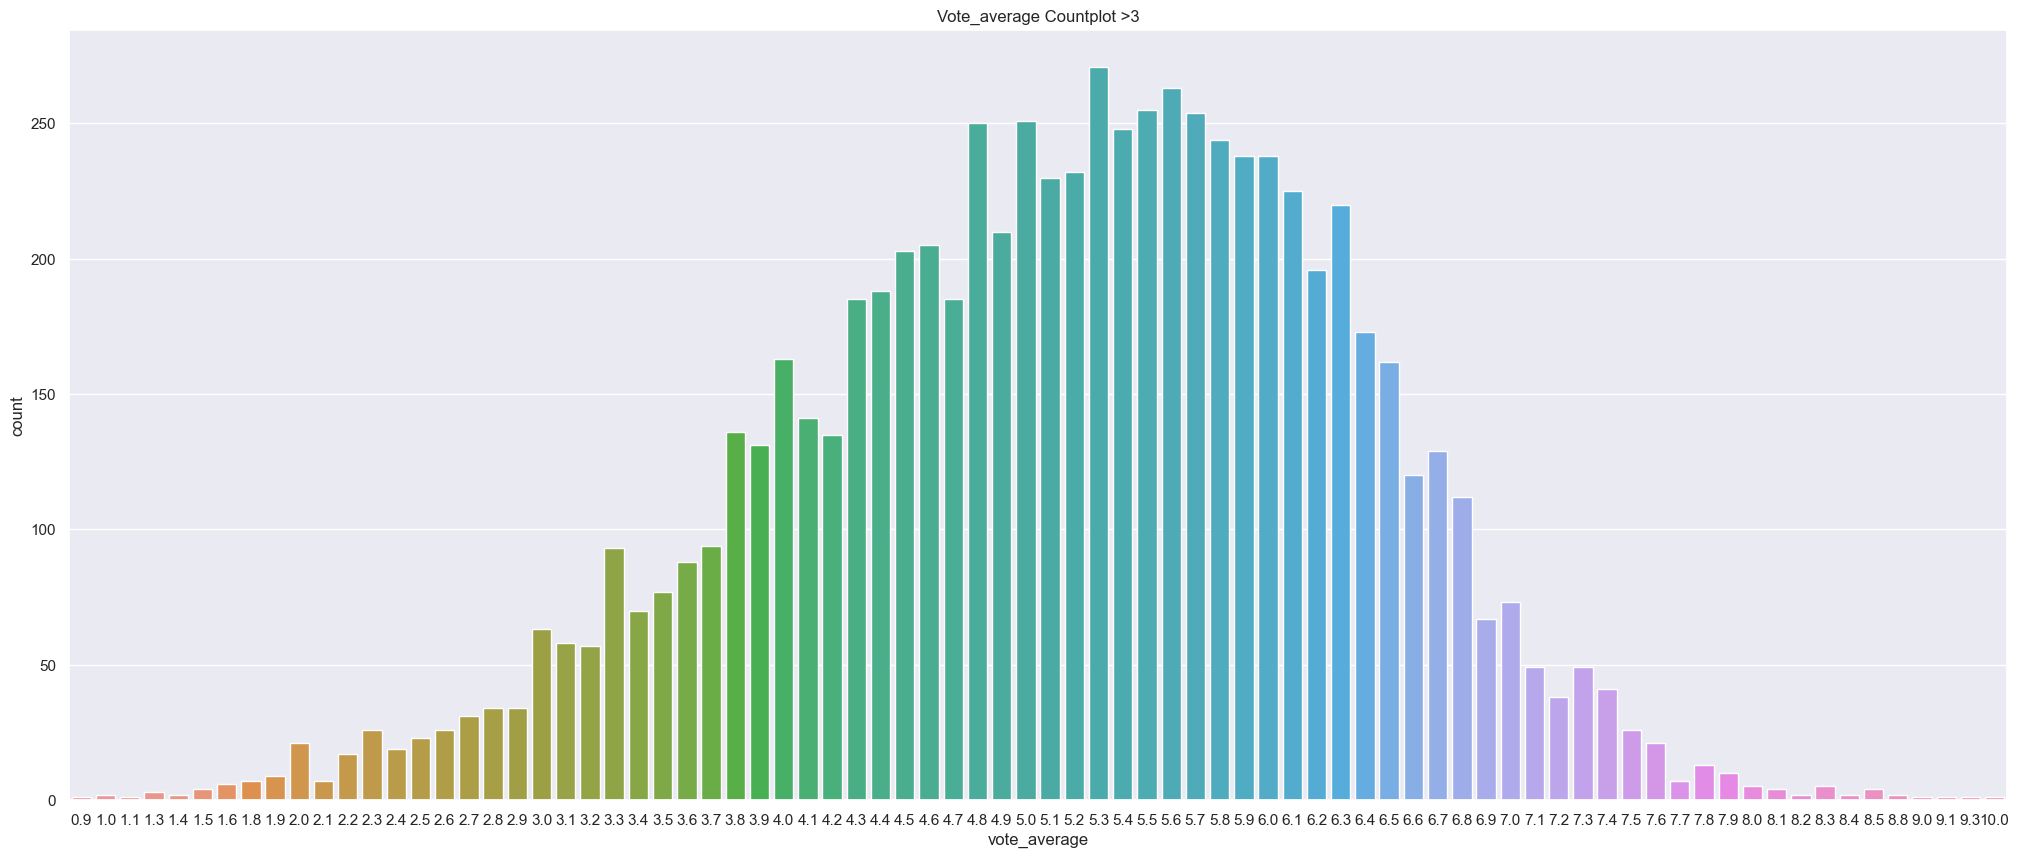

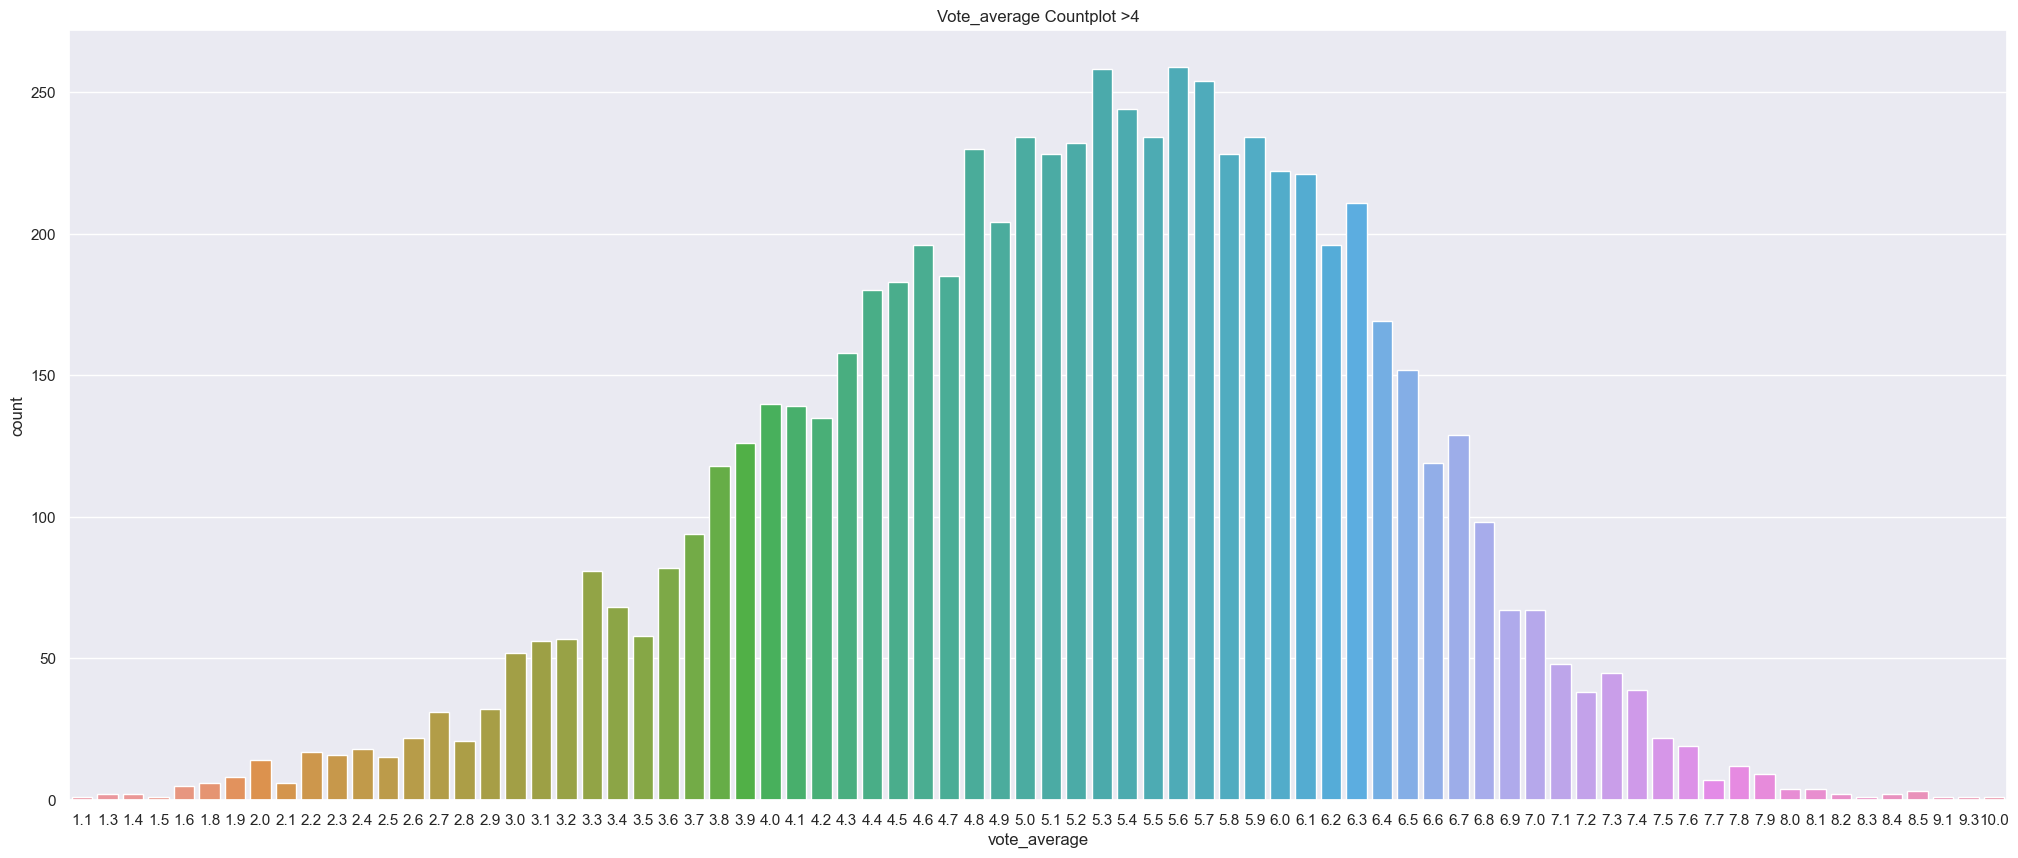

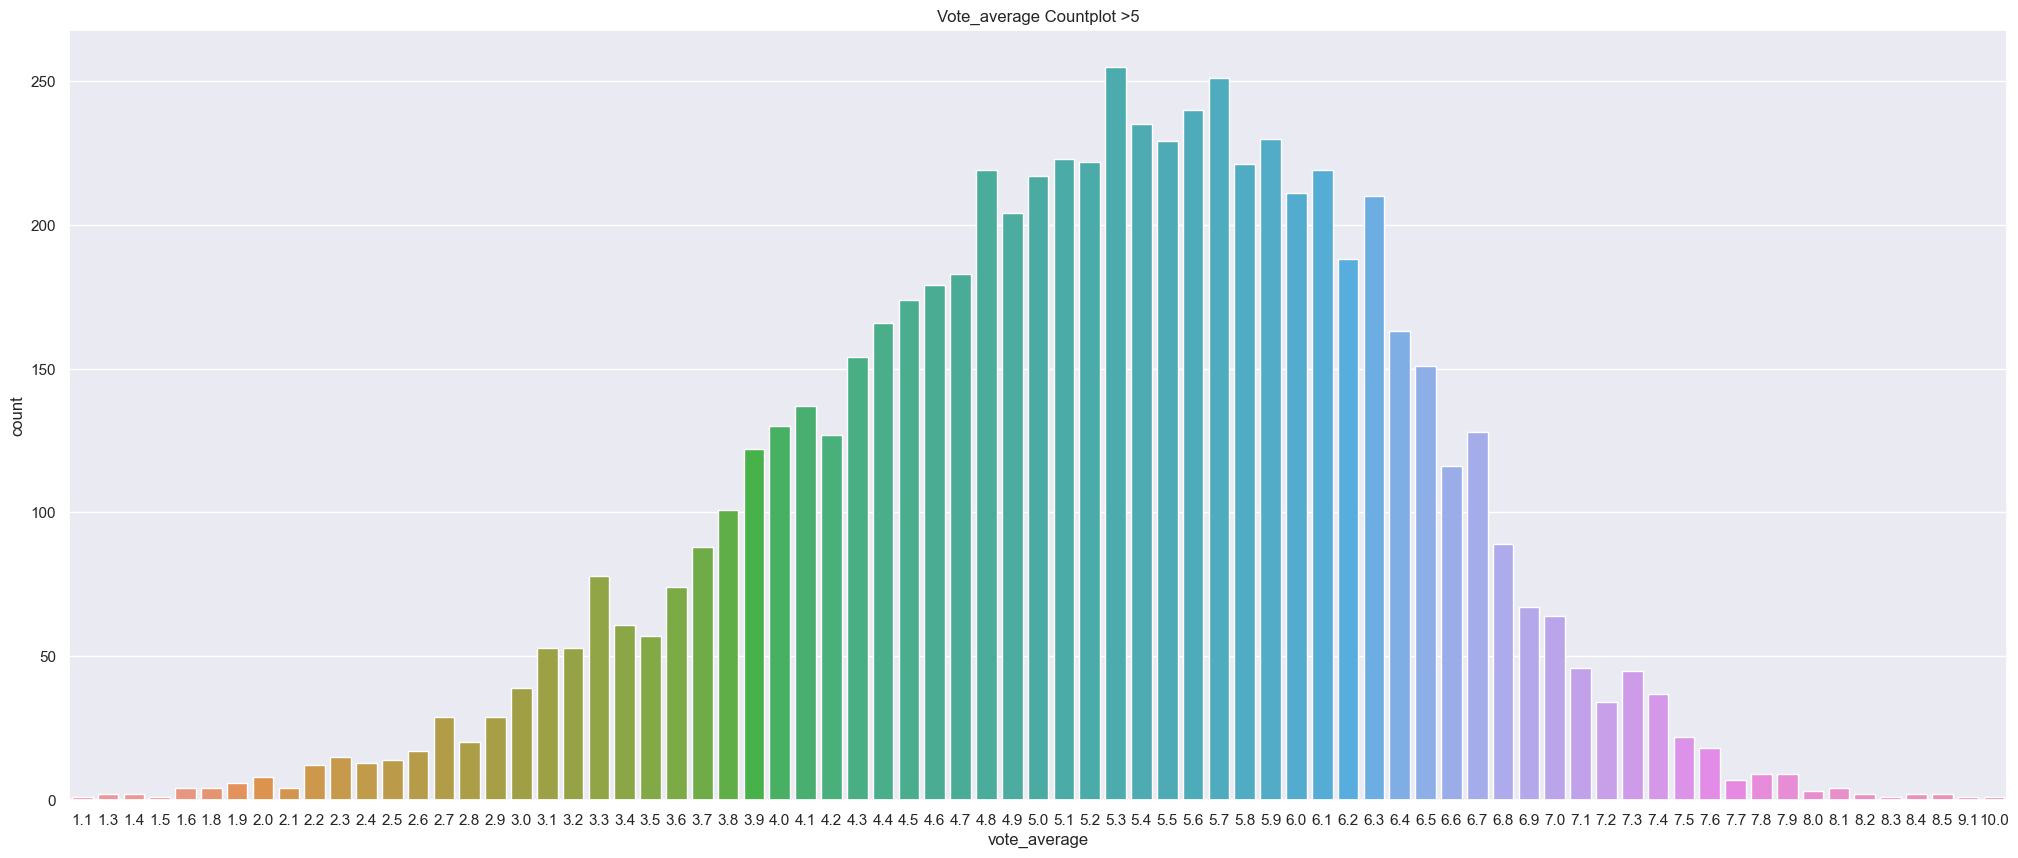

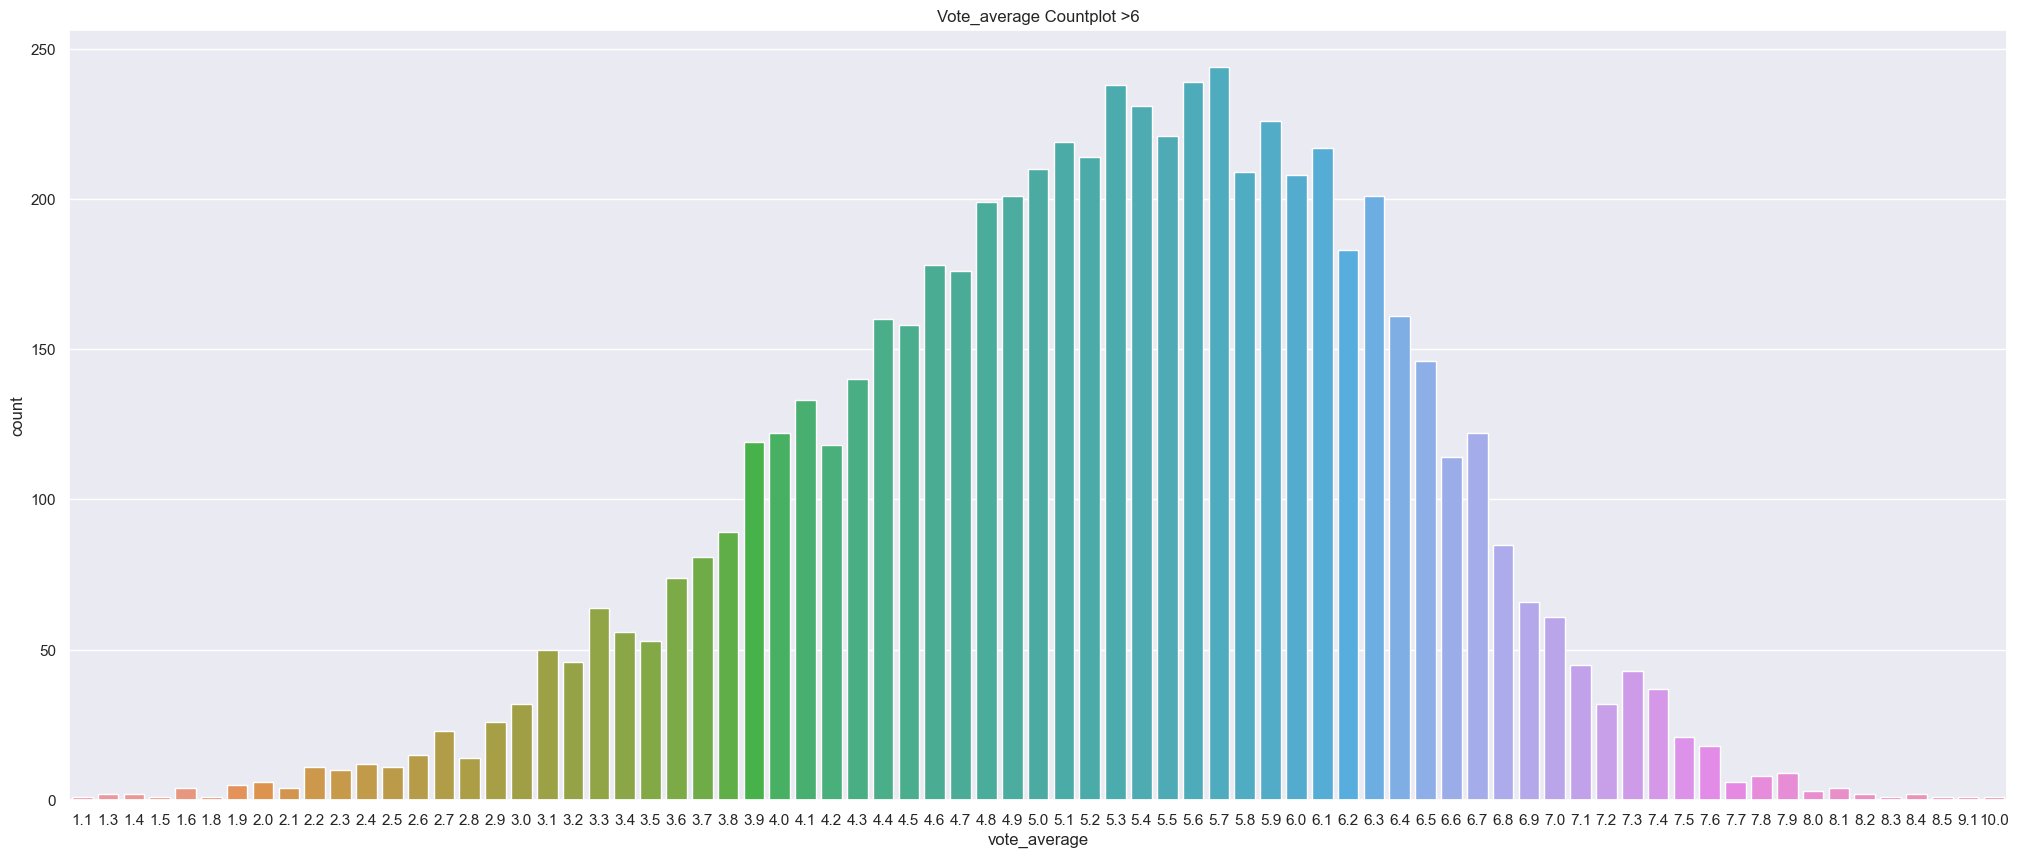

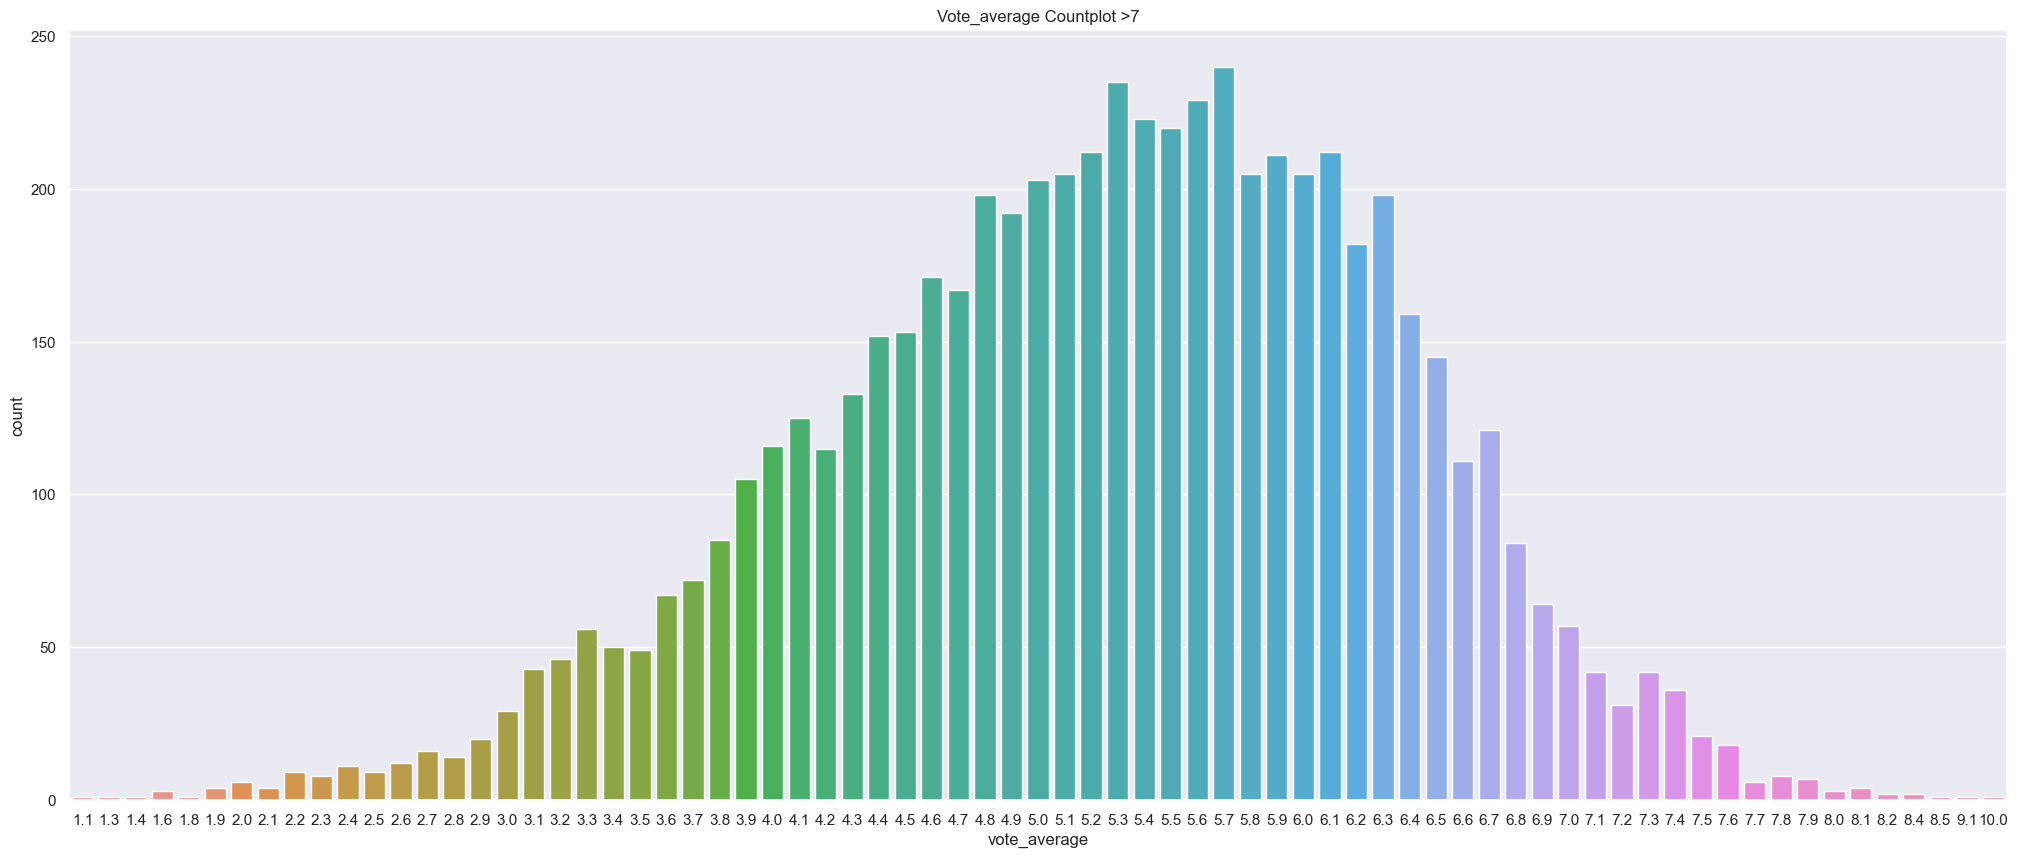

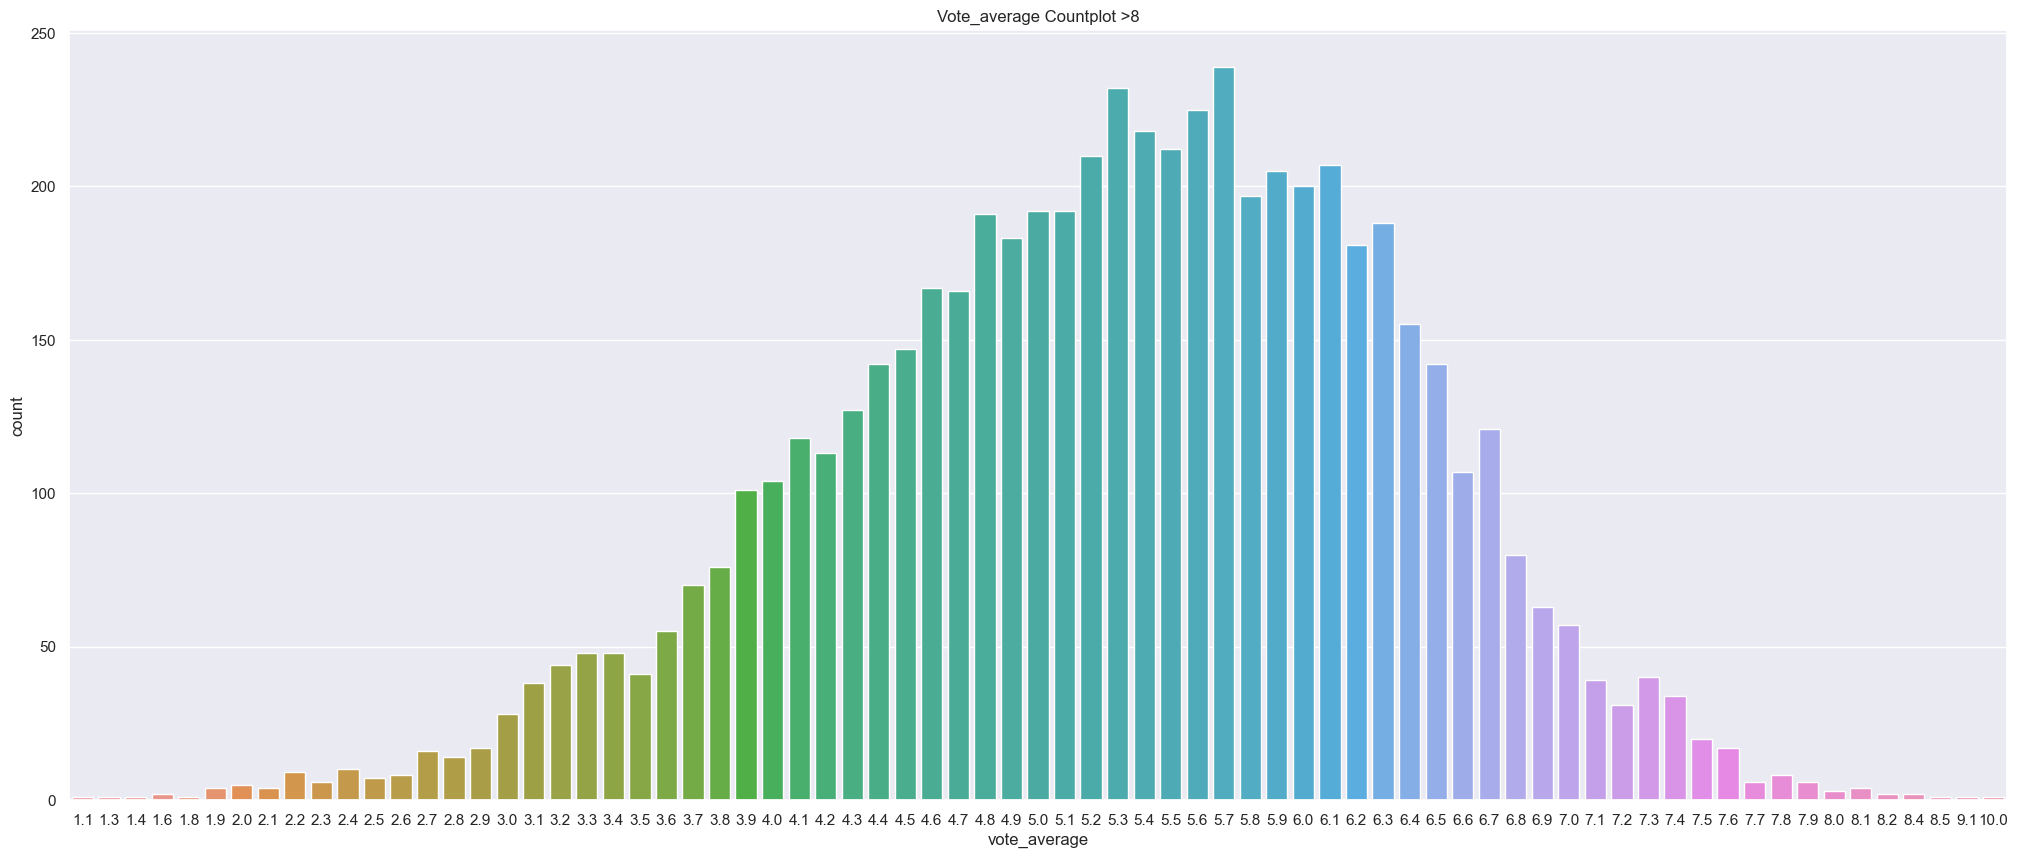

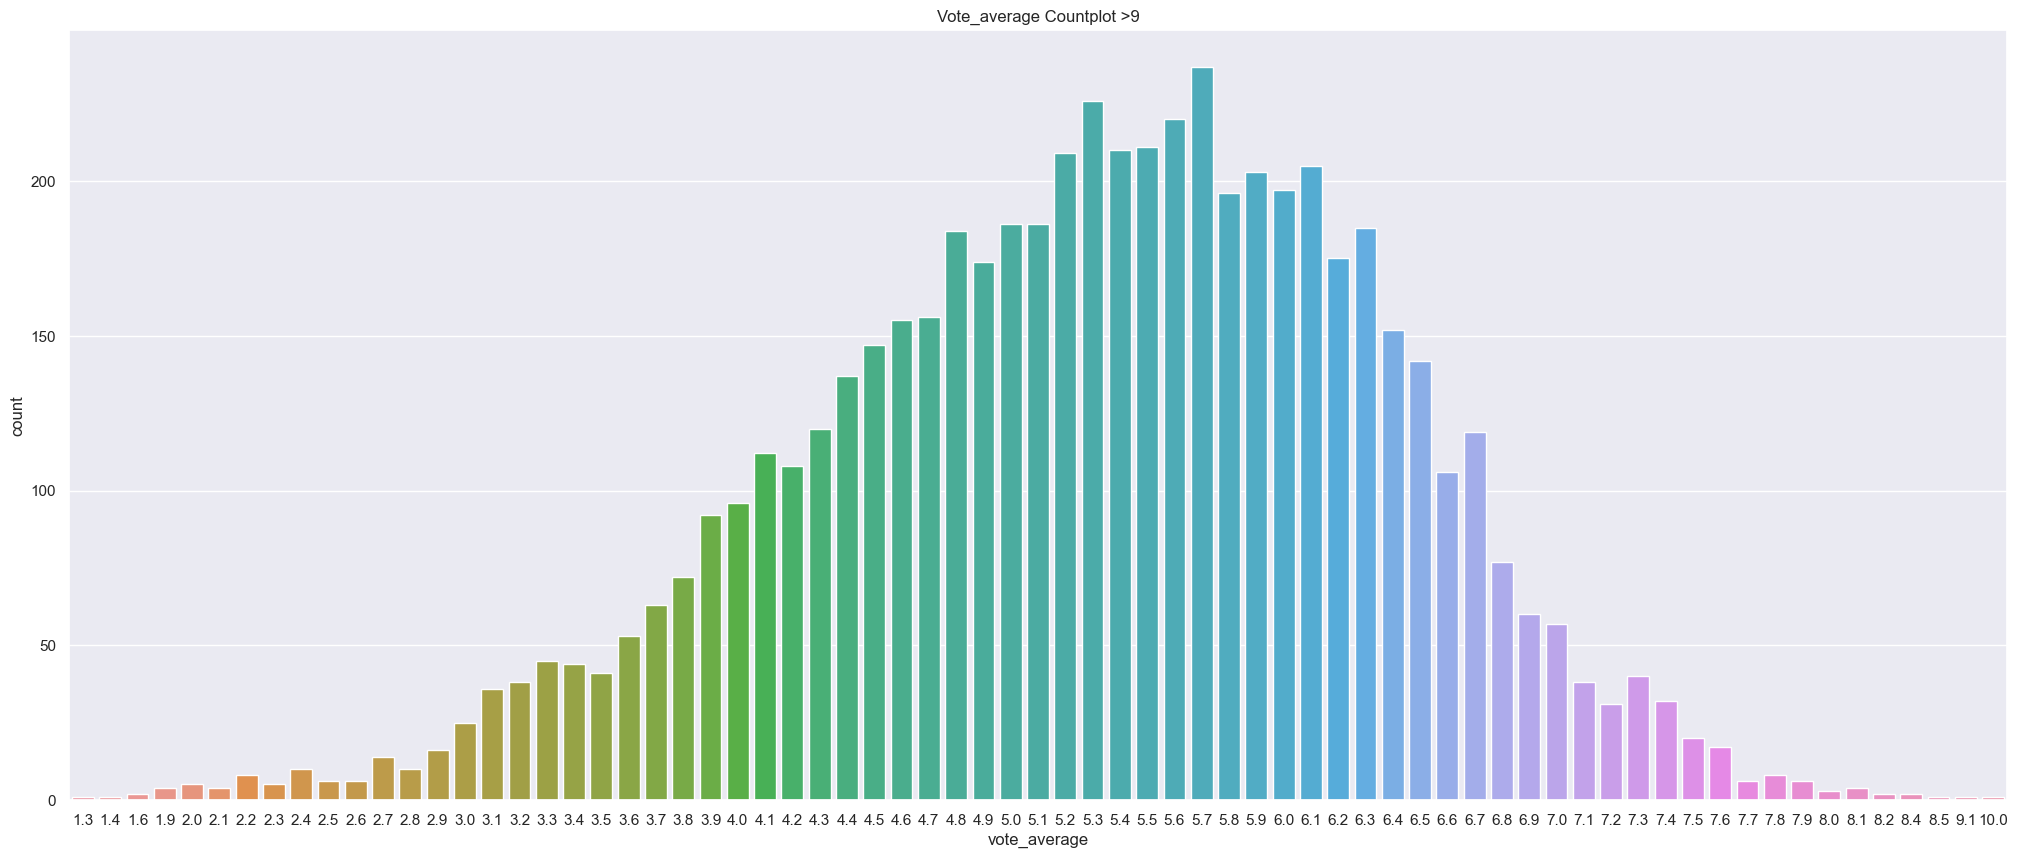

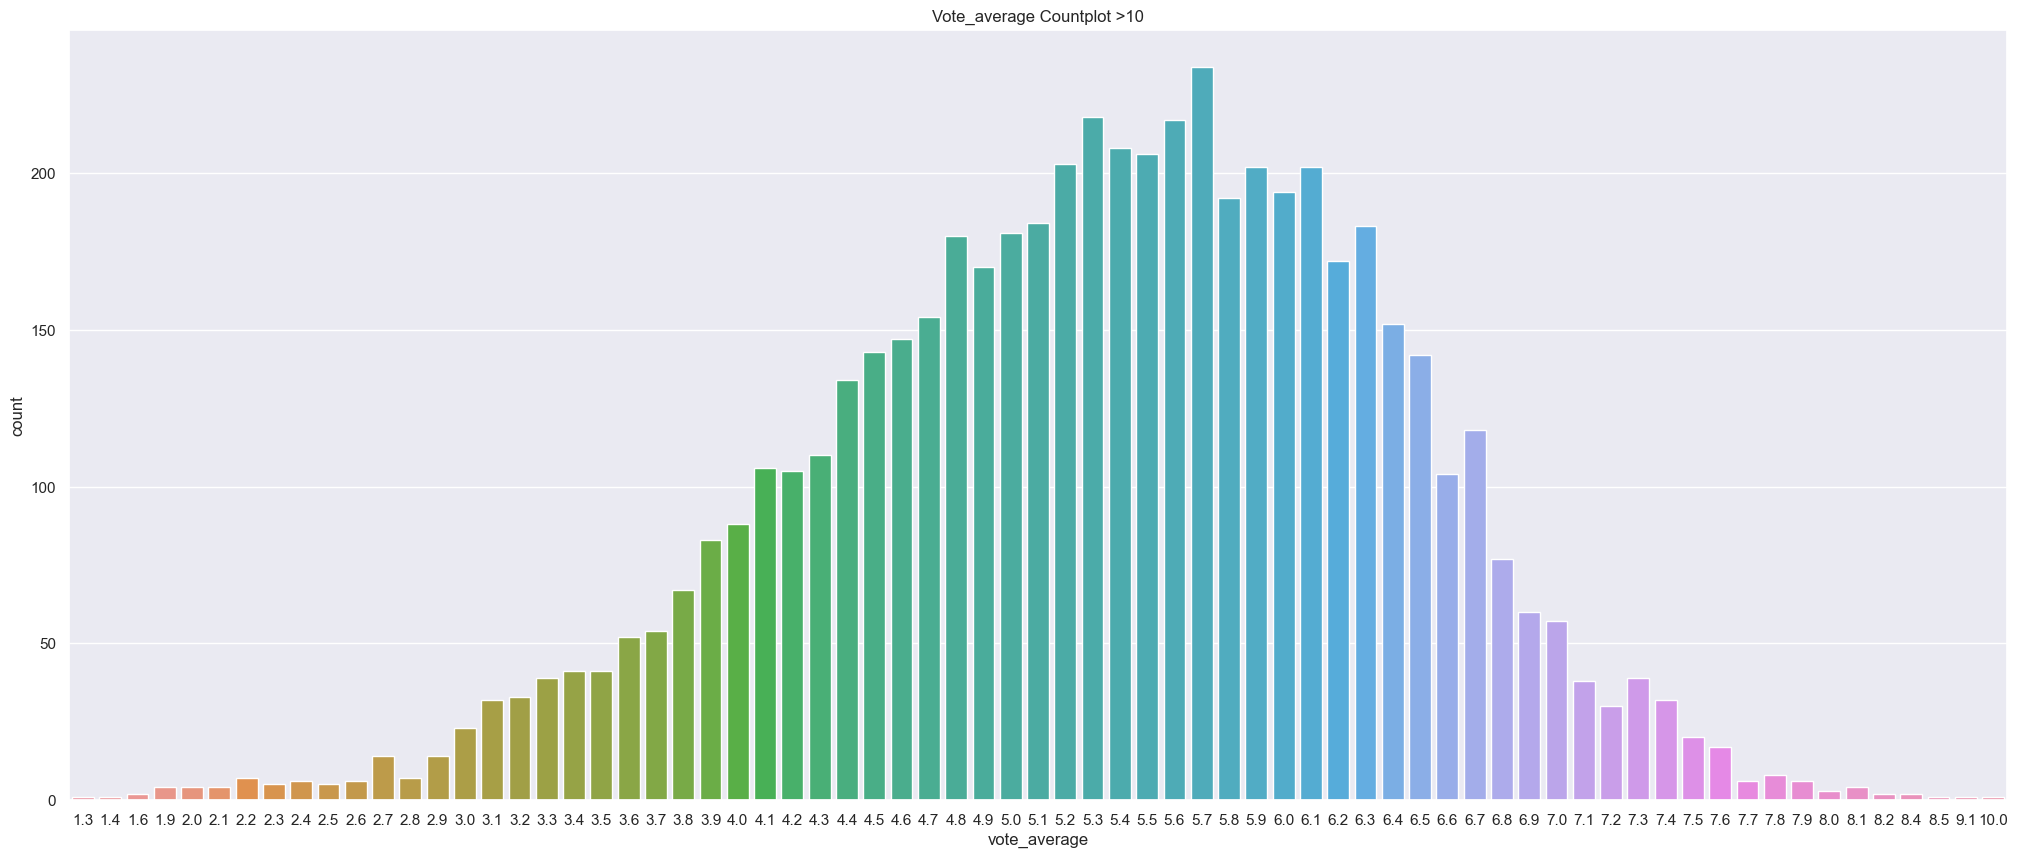

In [12]:
# From the above countplot, we could see that indeed there are quite a big number of outliers as well as multiple peaks
# Therefore, we try to plot more graphs at different 'vote_count' cutoff values
# Trying to get better, more normal distributed vote count graph

for i in range(11):
    voteDF = hmDF[(hmDF['vote_count'] > i)]
    f = plt.figure(figsize = (25, 10))
    sb.countplot(data = voteDF, x = 'vote_average').set(title = f'Vote_average Countplot >{i}')

In [13]:
# Based on the graphs, we will take data points with 'vote_count' larger than four
# Remove data points smaller or equals to four vote count
hmDF = hmDF[(hmDF['vote_count'] > 4)]
hmDF.shape

(7073, 20)

In [14]:
# So after all the data cleaning, we are left with 7073 data points which is still quite sufficient for machine learning

### Further Data Processing

In [15]:
# In order to make a prediction model, we first need to 'convert' the 'overview' and 'tagline' into a usable form
# So in this case, we will be using sentiment analysis to do the work
# It is basically a Natural Language Processing (NLP) model which gives a score based on text inputs

# Download nltk
# For first time users, remove the '#' infront of '!pip' to install
#!pip install nltk
import nltk

# So we import two libraries here
from nltk.sentiment.vader import SentimentIntensityAnalyzer # The NLP model for sentiment analysis
from tqdm.notebook import tqdm # Provides a progress bar feature things are running

sia = SentimentIntensityAnalyzer()

In [16]:
# Sentiment Analysis for Overview

# Create a dictionary to store the scores of each data point
scoresDict = {}

# Iterate through all rows and do the scoring, then store in the dictionary
for i, row in tqdm(hmDF.iterrows(), total=len(hmDF)):
    text_input = str(row['overview'])
    movie_id = row['id']
    scoresDict[movie_id] = sia.polarity_scores(text_input)

  0%|          | 0/7073 [00:00<?, ?it/s]

In [17]:
scoresDF = pd.DataFrame(scoresDict).T # transpose horizontal to vertical DF
scoresDF = scoresDF.reset_index() # Reset index of dataset in an ascending sequence
scoresDF

,index,neg,neu,pos,compound
0,760161,0.138,0.746,0.116,-0.4854
1,760741,0.155,0.845,0.000,-0.6908
2,882598,0.369,0.601,0.029,-0.9628
3,756999,0.325,0.597,0.078,-0.9746
4,717728,0.200,0.619,0.181,-0.2960
...,...,...,...,...,...
7068,679790,0.144,0.690,0.166,-0.0883
7069,717372,0.239,0.761,0.000,-0.5719
7070,781926,0.150,0.850,0.000,-0.5719
7071,788422,0.252,0.748,0.000,-0.9022


In [18]:
# So after resetting the index we can rename it to 'Id' since those numbers are the ID's of the movies
scoresDF = scoresDF.rename(columns={'index': 'Id'})
scoresDF

,Id,neg,neu,pos,compound
0,760161,0.138,0.746,0.116,-0.4854
1,760741,0.155,0.845,0.000,-0.6908
2,882598,0.369,0.601,0.029,-0.9628
3,756999,0.325,0.597,0.078,-0.9746
4,717728,0.200,0.619,0.181,-0.2960
...,...,...,...,...,...
7068,679790,0.144,0.690,0.166,-0.0883
7069,717372,0.239,0.761,0.000,-0.5719
7070,781926,0.150,0.850,0.000,-0.5719
7071,788422,0.252,0.748,0.000,-0.9022


In [19]:
#In order to concatenate scoresDF with our 'cleaned' dataset

# We will also need to reset the index here
cleanedhmDF = hmDF.reset_index()

 # For this case we drop this column as the old index is not in one by one ascending sequence
cleanedhmDF = cleanedhmDF.drop('index', axis = 'columns')
cleanedhmDF

,id,original_title,title,original_language,overview,tagline,release_date,poster_path,popularity,vote_count,vote_average,budget,revenue,runtime,status,adult,backdrop_path,genre_names,collection,collection_name
0,760161,Orphan: First Kill,Orphan: First Kill,en,After escaping from an Estonian psychiatric fa...,There's always been something wrong with Esther.,2022-07-27,/pHkKbIRoCe7zIFvqan9LFSaQAde.jpg,5088.584,902,6.9,0,9572765,99,Released,False,/5GA3vV1aWWHTSDO5eno8V5zDo8r.jpg,"Horror, Thriller",760193.0,Orphan Collection
1,760741,Beast,Beast,en,A recently widowed man and his two teenage dau...,Fight for family.,2022-08-11,/xIGr7UHsKf0URWmyyd5qFMAq4d8.jpg,2172.338,584,7.1,0,56000000,93,Released,False,/2k9tBql5GYH328Krj66tDT9LtFZ.jpg,"Adventure, Drama, Horror",NaN,NaN
2,882598,Smile,Smile,en,"After witnessing a bizarre, traumatic incident...","Once you see it, it’s too late.",2022-09-23,/hiaeZKzwsk4y4atFhmncO5KRxeT.jpg,1863.628,114,6.8,17000000,45000000,115,Released,False,/mVNPfpydornVe4H4UCIk7WevWjf.jpg,"Horror, Mystery, Thriller",NaN,NaN
3,756999,The Black Phone,The Black Phone,en,"Finney Blake, a shy but clever 13-year-old boy...",Never talk to strangers.,2022-06-22,/lr11mCT85T1JanlgjMuhs9nMht4.jpg,1071.398,2736,7.9,18800000,161000000,103,Released,False,/AfvIjhDu9p64jKcmohS4hsPG95Q.jpg,"Horror, Thriller",NaN,NaN
4,717728,Jeepers Creepers: Reborn,Jeepers Creepers: Reborn,en,Forced to travel with her boyfriend to a horro...,Evil Rides Again,2022-09-15,/aGBuiirBIQ7o64FmJxO53eYDuro.jpg,821.605,125,5.8,20000000,2892594,88,Released,False,/tIX6j3NzadlwGcJ52nuWdmtOQkg.jpg,"Horror, Mystery, Thriller",94899.0,Jeepers Creepers Collection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,679790,DD[0]Ser,DD[0]Ser,en,"An origin story for the ages. Technomancy, The...",Are the Gods of Tech Smiling?,2020-03-01,/2lH7WndVCCN9k4y87VC4DczWUOx.jpg,0.600,15,6.1,0,0,13,Released,False,/lzGT8GuS2vQnF48qOItTAeaPvCd.jpg,Horror,NaN,NaN
7069,717372,Hungry Joe,Hungry Joe,en,A single mother struggles to bond with her apa...,He’s a growing boy...,2020-02-01,/2IaGTu9mTAFdbugUMBSAPHcdPUu.jpg,0.600,5,5.0,0,0,23,Released,False,/epV08coGOdq5huzjJ9NKspDGZOX.jpg,Horror,NaN,NaN
7070,781926,The Return of Shitters,The Return of Shitters,en,Three years have passed since the last inciden...,Just when you thought it was safe to shit again.,2021-01-21,/jwG4y2m4sCmuQjW0tAeNSXOrp46.jpg,0.600,5,4.7,0,0,9,Released,False,/t4n7bnqn0T2NaNVD7VGFdfeXGNw.jpg,"Comedy, Horror",860029.0,Shitters Collection
7071,788422,Flesh Contagium,Flesh Contagium,it,In a world devastated by a pandemic virus and ...,Body mutation... mind destruction!,2020-12-15,/hooSfhOlyaVKsi6E3hLB68AiuLk.jpg,0.600,5,5.4,0,0,67,Released,False,/9t8Yq8vSH4T9wcPbyTRjUlze6VJ.jpg,Horror,NaN,NaN


In [20]:
# After we reset index for both dataset, we are then ready to concatenate them
combinedDF = pd.concat([cleanedhmDF, scoresDF], axis = 'columns')

# We can also rename the 'pos', 'neu', 'neg' and 'compound' to 'overview_neg', 'overview_neu' etc for clarity
combinedDF = combinedDF.rename(columns = {'neg': 'overview_neg', 'neu': 'overview_neu', 'pos': 'overview_pos', 'compound': 'overview_compound'})
combinedDF

,id,original_title,title,original_language,overview,tagline,release_date,poster_path,popularity,vote_count,...,adult,backdrop_path,genre_names,collection,collection_name,Id,overview_neg,overview_neu,overview_pos,overview_compound
0,760161,Orphan: First Kill,Orphan: First Kill,en,After escaping from an Estonian psychiatric fa...,There's always been something wrong with Esther.,2022-07-27,/pHkKbIRoCe7zIFvqan9LFSaQAde.jpg,5088.584,902,...,False,/5GA3vV1aWWHTSDO5eno8V5zDo8r.jpg,"Horror, Thriller",760193.0,Orphan Collection,760161,0.138,0.746,0.116,-0.4854
1,760741,Beast,Beast,en,A recently widowed man and his two teenage dau...,Fight for family.,2022-08-11,/xIGr7UHsKf0URWmyyd5qFMAq4d8.jpg,2172.338,584,...,False,/2k9tBql5GYH328Krj66tDT9LtFZ.jpg,"Adventure, Drama, Horror",NaN,NaN,760741,0.155,0.845,0.000,-0.6908
2,882598,Smile,Smile,en,"After witnessing a bizarre, traumatic incident...","Once you see it, it’s too late.",2022-09-23,/hiaeZKzwsk4y4atFhmncO5KRxeT.jpg,1863.628,114,...,False,/mVNPfpydornVe4H4UCIk7WevWjf.jpg,"Horror, Mystery, Thriller",NaN,NaN,882598,0.369,0.601,0.029,-0.9628
3,756999,The Black Phone,The Black Phone,en,"Finney Blake, a shy but clever 13-year-old boy...",Never talk to strangers.,2022-06-22,/lr11mCT85T1JanlgjMuhs9nMht4.jpg,1071.398,2736,...,False,/AfvIjhDu9p64jKcmohS4hsPG95Q.jpg,"Horror, Thriller",NaN,NaN,756999,0.325,0.597,0.078,-0.9746
4,717728,Jeepers Creepers: Reborn,Jeepers Creepers: Reborn,en,Forced to travel with her boyfriend to a horro...,Evil Rides Again,2022-09-15,/aGBuiirBIQ7o64FmJxO53eYDuro.jpg,821.605,125,...,False,/tIX6j3NzadlwGcJ52nuWdmtOQkg.jpg,"Horror, Mystery, Thriller",94899.0,Jeepers Creepers Collection,717728,0.200,0.619,0.181,-0.2960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,679790,DD[0]Ser,DD[0]Ser,en,"An origin story for the ages. Technomancy, The...",Are the Gods of Tech Smiling?,2020-03-01,/2lH7WndVCCN9k4y87VC4DczWUOx.jpg,0.600,15,...,False,/lzGT8GuS2vQnF48qOItTAeaPvCd.jpg,Horror,NaN,NaN,679790,0.144,0.690,0.166,-0.0883
7069,717372,Hungry Joe,Hungry Joe,en,A single mother struggles to bond with her apa...,He’s a growing boy...,2020-02-01,/2IaGTu9mTAFdbugUMBSAPHcdPUu.jpg,0.600,5,...,False,/epV08coGOdq5huzjJ9NKspDGZOX.jpg,Horror,NaN,NaN,717372,0.239,0.761,0.000,-0.5719
7070,781926,The Return of Shitters,The Return of Shitters,en,Three years have passed since the last inciden...,Just when you thought it was safe to shit again.,2021-01-21,/jwG4y2m4sCmuQjW0tAeNSXOrp46.jpg,0.600,5,...,False,/t4n7bnqn0T2NaNVD7VGFdfeXGNw.jpg,"Comedy, Horror",860029.0,Shitters Collection,781926,0.150,0.850,0.000,-0.5719
7071,788422,Flesh Contagium,Flesh Contagium,it,In a world devastated by a pandemic virus and ...,Body mutation... mind destruction!,2020-12-15,/hooSfhOlyaVKsi6E3hLB68AiuLk.jpg,0.600,5,...,False,/9t8Yq8vSH4T9wcPbyTRjUlze6VJ.jpg,Horror,NaN,NaN,788422,0.252,0.748,0.000,-0.9022


In [21]:
# As we can visualize from the dataset, each score is matched correctly with its corresponding movie based on the IDs
# Thus we can remove the extra 'Id' behind
combinedDF = combinedDF.drop('Id', axis = 'columns')
combinedDF

,id,original_title,title,original_language,overview,tagline,release_date,poster_path,popularity,vote_count,...,status,adult,backdrop_path,genre_names,collection,collection_name,overview_neg,overview_neu,overview_pos,overview_compound
0,760161,Orphan: First Kill,Orphan: First Kill,en,After escaping from an Estonian psychiatric fa...,There's always been something wrong with Esther.,2022-07-27,/pHkKbIRoCe7zIFvqan9LFSaQAde.jpg,5088.584,902,...,Released,False,/5GA3vV1aWWHTSDO5eno8V5zDo8r.jpg,"Horror, Thriller",760193.0,Orphan Collection,0.138,0.746,0.116,-0.4854
1,760741,Beast,Beast,en,A recently widowed man and his two teenage dau...,Fight for family.,2022-08-11,/xIGr7UHsKf0URWmyyd5qFMAq4d8.jpg,2172.338,584,...,Released,False,/2k9tBql5GYH328Krj66tDT9LtFZ.jpg,"Adventure, Drama, Horror",NaN,NaN,0.155,0.845,0.000,-0.6908
2,882598,Smile,Smile,en,"After witnessing a bizarre, traumatic incident...","Once you see it, it’s too late.",2022-09-23,/hiaeZKzwsk4y4atFhmncO5KRxeT.jpg,1863.628,114,...,Released,False,/mVNPfpydornVe4H4UCIk7WevWjf.jpg,"Horror, Mystery, Thriller",NaN,NaN,0.369,0.601,0.029,-0.9628
3,756999,The Black Phone,The Black Phone,en,"Finney Blake, a shy but clever 13-year-old boy...",Never talk to strangers.,2022-06-22,/lr11mCT85T1JanlgjMuhs9nMht4.jpg,1071.398,2736,...,Released,False,/AfvIjhDu9p64jKcmohS4hsPG95Q.jpg,"Horror, Thriller",NaN,NaN,0.325,0.597,0.078,-0.9746
4,717728,Jeepers Creepers: Reborn,Jeepers Creepers: Reborn,en,Forced to travel with her boyfriend to a horro...,Evil Rides Again,2022-09-15,/aGBuiirBIQ7o64FmJxO53eYDuro.jpg,821.605,125,...,Released,False,/tIX6j3NzadlwGcJ52nuWdmtOQkg.jpg,"Horror, Mystery, Thriller",94899.0,Jeepers Creepers Collection,0.200,0.619,0.181,-0.2960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,679790,DD[0]Ser,DD[0]Ser,en,"An origin story for the ages. Technomancy, The...",Are the Gods of Tech Smiling?,2020-03-01,/2lH7WndVCCN9k4y87VC4DczWUOx.jpg,0.600,15,...,Released,False,/lzGT8GuS2vQnF48qOItTAeaPvCd.jpg,Horror,NaN,NaN,0.144,0.690,0.166,-0.0883
7069,717372,Hungry Joe,Hungry Joe,en,A single mother struggles to bond with her apa...,He’s a growing boy...,2020-02-01,/2IaGTu9mTAFdbugUMBSAPHcdPUu.jpg,0.600,5,...,Released,False,/epV08coGOdq5huzjJ9NKspDGZOX.jpg,Horror,NaN,NaN,0.239,0.761,0.000,-0.5719
7070,781926,The Return of Shitters,The Return of Shitters,en,Three years have passed since the last inciden...,Just when you thought it was safe to shit again.,2021-01-21,/jwG4y2m4sCmuQjW0tAeNSXOrp46.jpg,0.600,5,...,Released,False,/t4n7bnqn0T2NaNVD7VGFdfeXGNw.jpg,"Comedy, Horror",860029.0,Shitters Collection,0.150,0.850,0.000,-0.5719
7071,788422,Flesh Contagium,Flesh Contagium,it,In a world devastated by a pandemic virus and ...,Body mutation... mind destruction!,2020-12-15,/hooSfhOlyaVKsi6E3hLB68AiuLk.jpg,0.600,5,...,Released,False,/9t8Yq8vSH4T9wcPbyTRjUlze6VJ.jpg,Horror,NaN,NaN,0.252,0.748,0.000,-0.9022


In [22]:
# Sentiment Analysis for Tagline
# So for this part we can just do the same thing as what we did with the overview, but with the variable 'tagline'
# We compile some of the codes together to save up some space for this part

scoresDict = {}
for i, row in tqdm(hmDF.iterrows(), total=len(hmDF)):
    text_input = str(row['tagline'])
    movie_id = row['id']
    scoresDict[movie_id] = sia.polarity_scores(text_input)

  0%|          | 0/7073 [00:00<?, ?it/s]

In [23]:
scoresDF = pd.DataFrame(scoresDict).T
scoresDF = scoresDF.reset_index()
scoresDF = scoresDF.rename(columns={'index': 'Id'})
scoresDF

,Id,neg,neu,pos,compound
0,760161,0.341,0.659,0.000,-0.4767
1,760741,0.565,0.435,0.000,-0.3818
2,882598,0.000,1.000,0.000,0.0000
3,756999,0.000,1.000,0.000,0.0000
4,717728,0.688,0.312,0.000,-0.6597
...,...,...,...,...,...
7068,679790,0.000,0.625,0.375,0.4588
7069,717372,0.000,0.541,0.459,0.1779
7070,781926,0.248,0.552,0.200,-0.1779
7071,788422,0.571,0.429,0.000,-0.6114


In [24]:
combinedDF = pd.concat([combinedDF, scoresDF], axis = 'columns')
combinedDF = combinedDF.rename(columns = {'neg': 'tagline_neg', 'neu': 'tagline_neu', 'pos': 'tagline_pos', 'compound': 'tagline_compound'})
combinedDF

,id,original_title,title,original_language,overview,tagline,release_date,poster_path,popularity,vote_count,...,collection_name,overview_neg,overview_neu,overview_pos,overview_compound,Id,tagline_neg,tagline_neu,tagline_pos,tagline_compound
0,760161,Orphan: First Kill,Orphan: First Kill,en,After escaping from an Estonian psychiatric fa...,There's always been something wrong with Esther.,2022-07-27,/pHkKbIRoCe7zIFvqan9LFSaQAde.jpg,5088.584,902,...,Orphan Collection,0.138,0.746,0.116,-0.4854,760161,0.341,0.659,0.000,-0.4767
1,760741,Beast,Beast,en,A recently widowed man and his two teenage dau...,Fight for family.,2022-08-11,/xIGr7UHsKf0URWmyyd5qFMAq4d8.jpg,2172.338,584,...,NaN,0.155,0.845,0.000,-0.6908,760741,0.565,0.435,0.000,-0.3818
2,882598,Smile,Smile,en,"After witnessing a bizarre, traumatic incident...","Once you see it, it’s too late.",2022-09-23,/hiaeZKzwsk4y4atFhmncO5KRxeT.jpg,1863.628,114,...,NaN,0.369,0.601,0.029,-0.9628,882598,0.000,1.000,0.000,0.0000
3,756999,The Black Phone,The Black Phone,en,"Finney Blake, a shy but clever 13-year-old boy...",Never talk to strangers.,2022-06-22,/lr11mCT85T1JanlgjMuhs9nMht4.jpg,1071.398,2736,...,NaN,0.325,0.597,0.078,-0.9746,756999,0.000,1.000,0.000,0.0000
4,717728,Jeepers Creepers: Reborn,Jeepers Creepers: Reborn,en,Forced to travel with her boyfriend to a horro...,Evil Rides Again,2022-09-15,/aGBuiirBIQ7o64FmJxO53eYDuro.jpg,821.605,125,...,Jeepers Creepers Collection,0.200,0.619,0.181,-0.2960,717728,0.688,0.312,0.000,-0.6597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,679790,DD[0]Ser,DD[0]Ser,en,"An origin story for the ages. Technomancy, The...",Are the Gods of Tech Smiling?,2020-03-01,/2lH7WndVCCN9k4y87VC4DczWUOx.jpg,0.600,15,...,NaN,0.144,0.690,0.166,-0.0883,679790,0.000,0.625,0.375,0.4588
7069,717372,Hungry Joe,Hungry Joe,en,A single mother struggles to bond with her apa...,He’s a growing boy...,2020-02-01,/2IaGTu9mTAFdbugUMBSAPHcdPUu.jpg,0.600,5,...,NaN,0.239,0.761,0.000,-0.5719,717372,0.000,0.541,0.459,0.1779
7070,781926,The Return of Shitters,The Return of Shitters,en,Three years have passed since the last inciden...,Just when you thought it was safe to shit again.,2021-01-21,/jwG4y2m4sCmuQjW0tAeNSXOrp46.jpg,0.600,5,...,Shitters Collection,0.150,0.850,0.000,-0.5719,781926,0.248,0.552,0.200,-0.1779
7071,788422,Flesh Contagium,Flesh Contagium,it,In a world devastated by a pandemic virus and ...,Body mutation... mind destruction!,2020-12-15,/hooSfhOlyaVKsi6E3hLB68AiuLk.jpg,0.600,5,...,NaN,0.252,0.748,0.000,-0.9022,788422,0.571,0.429,0.000,-0.6114


In [25]:
# After checking again, we can see each score is matched correctly with its corresponding movie based on the IDs
# Thus we can remove the extra 'Id' behind
combinedDF = combinedDF.drop('Id', axis = 'columns')
combinedDF

,id,original_title,title,original_language,overview,tagline,release_date,poster_path,popularity,vote_count,...,collection,collection_name,overview_neg,overview_neu,overview_pos,overview_compound,tagline_neg,tagline_neu,tagline_pos,tagline_compound
0,760161,Orphan: First Kill,Orphan: First Kill,en,After escaping from an Estonian psychiatric fa...,There's always been something wrong with Esther.,2022-07-27,/pHkKbIRoCe7zIFvqan9LFSaQAde.jpg,5088.584,902,...,760193.0,Orphan Collection,0.138,0.746,0.116,-0.4854,0.341,0.659,0.000,-0.4767
1,760741,Beast,Beast,en,A recently widowed man and his two teenage dau...,Fight for family.,2022-08-11,/xIGr7UHsKf0URWmyyd5qFMAq4d8.jpg,2172.338,584,...,NaN,NaN,0.155,0.845,0.000,-0.6908,0.565,0.435,0.000,-0.3818
2,882598,Smile,Smile,en,"After witnessing a bizarre, traumatic incident...","Once you see it, it’s too late.",2022-09-23,/hiaeZKzwsk4y4atFhmncO5KRxeT.jpg,1863.628,114,...,NaN,NaN,0.369,0.601,0.029,-0.9628,0.000,1.000,0.000,0.0000
3,756999,The Black Phone,The Black Phone,en,"Finney Blake, a shy but clever 13-year-old boy...",Never talk to strangers.,2022-06-22,/lr11mCT85T1JanlgjMuhs9nMht4.jpg,1071.398,2736,...,NaN,NaN,0.325,0.597,0.078,-0.9746,0.000,1.000,0.000,0.0000
4,717728,Jeepers Creepers: Reborn,Jeepers Creepers: Reborn,en,Forced to travel with her boyfriend to a horro...,Evil Rides Again,2022-09-15,/aGBuiirBIQ7o64FmJxO53eYDuro.jpg,821.605,125,...,94899.0,Jeepers Creepers Collection,0.200,0.619,0.181,-0.2960,0.688,0.312,0.000,-0.6597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,679790,DD[0]Ser,DD[0]Ser,en,"An origin story for the ages. Technomancy, The...",Are the Gods of Tech Smiling?,2020-03-01,/2lH7WndVCCN9k4y87VC4DczWUOx.jpg,0.600,15,...,NaN,NaN,0.144,0.690,0.166,-0.0883,0.000,0.625,0.375,0.4588
7069,717372,Hungry Joe,Hungry Joe,en,A single mother struggles to bond with her apa...,He’s a growing boy...,2020-02-01,/2IaGTu9mTAFdbugUMBSAPHcdPUu.jpg,0.600,5,...,NaN,NaN,0.239,0.761,0.000,-0.5719,0.000,0.541,0.459,0.1779
7070,781926,The Return of Shitters,The Return of Shitters,en,Three years have passed since the last inciden...,Just when you thought it was safe to shit again.,2021-01-21,/jwG4y2m4sCmuQjW0tAeNSXOrp46.jpg,0.600,5,...,860029.0,Shitters Collection,0.150,0.850,0.000,-0.5719,0.248,0.552,0.200,-0.1779
7071,788422,Flesh Contagium,Flesh Contagium,it,In a world devastated by a pandemic virus and ...,Body mutation... mind destruction!,2020-12-15,/hooSfhOlyaVKsi6E3hLB68AiuLk.jpg,0.600,5,...,NaN,NaN,0.252,0.748,0.000,-0.9022,0.571,0.429,0.000,-0.6114


In [26]:
# After obtaining the 'processed' dataset, we now can extract the useful columns out from the dataset
# We will be keeping 'title', 'overview' and 'tagline' here for reference incase we need them
usefulDF = pd.DataFrame(combinedDF[['title','overview','tagline','vote_average','overview_compound','tagline_compound']])
usefulDF

,title,overview,tagline,vote_average,overview_compound,tagline_compound
0,Orphan: First Kill,After escaping from an Estonian psychiatric fa...,There's always been something wrong with Esther.,6.9,-0.4854,-0.4767
1,Beast,A recently widowed man and his two teenage dau...,Fight for family.,7.1,-0.6908,-0.3818
2,Smile,"After witnessing a bizarre, traumatic incident...","Once you see it, it’s too late.",6.8,-0.9628,0.0000
3,The Black Phone,"Finney Blake, a shy but clever 13-year-old boy...",Never talk to strangers.,7.9,-0.9746,0.0000
4,Jeepers Creepers: Reborn,Forced to travel with her boyfriend to a horro...,Evil Rides Again,5.8,-0.2960,-0.6597
...,...,...,...,...,...,...
7068,DD[0]Ser,"An origin story for the ages. Technomancy, The...",Are the Gods of Tech Smiling?,6.1,-0.0883,0.4588
7069,Hungry Joe,A single mother struggles to bond with her apa...,He’s a growing boy...,5.0,-0.5719,0.1779
7070,The Return of Shitters,Three years have passed since the last inciden...,Just when you thought it was safe to shit again.,4.7,-0.5719,-0.1779
7071,Flesh Contagium,In a world devastated by a pandemic virus and ...,Body mutation... mind destruction!,5.4,-0.9022,-0.6114


In [43]:
# Last step before fitting our model, we need to split the dataset into 'train' and 'test' dataset
# In this case, we will be splitting them into 3:1 ratio

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = pd.DataFrame(usefulDF[['overview_compound','tagline_compound']])
y = pd.DataFrame(usefulDF['vote_average'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(5304, 2) (1769, 2)
(5304, 1) (1769, 1)


### Linear Regression

In [44]:
# First, we will be performing predictions using Linear Regression Model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

#### Predicting 'vote_average' with 'overview_compound' (Train Dataset)

In [45]:
X_train_univar = pd.DataFrame(X_train['overview_compound'])
y_train_univar = pd.DataFrame(y_train)

linreg.fit(X_train_univar, y_train_univar)

y_pred_train = linreg.predict(X_train_univar)

In [46]:
# Explained Variance, R^2
r2_score(y_train_univar, y_pred_train)

0.00042312789735066136

In [47]:
# Mean Squared Error, MSE
mean_squared_error(y_train_univar, y_pred_train)

1.2860620292553533

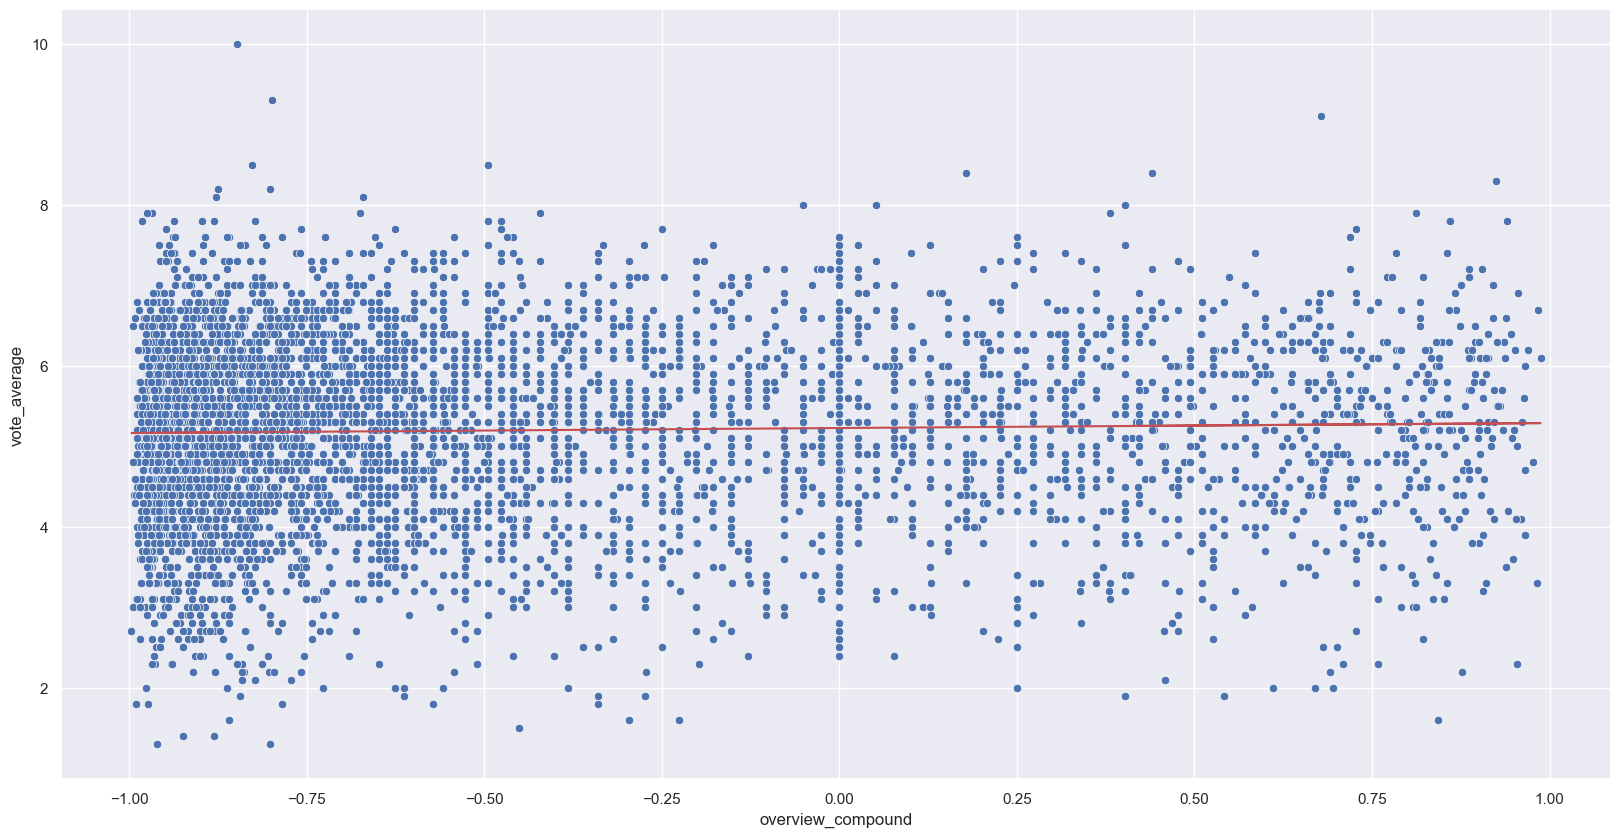

In [39]:
# Ploting a scatterplot of 'overview_compound' vs 'vote_average' of train data
# Also including the 'best fit line'
f = plt.figure(figsize = (20, 10))
X_train_univar = X_train_univar.reset_index().drop('index', axis = 'columns')
y_train_univar = y_train_univar.reset_index().drop('index', axis = 'columns')
scatterplotDF = pd.concat([X_train_univar, y_train_univar], axis = 'columns')
sb.scatterplot(data = scatterplotDF, x = 'overview_compound', y = 'vote_average')
plt.plot(X_train_univar, y_pred_train, 'r')

#### Predicting 'vote_average' with 'overview_compound' (Test Dataset)

In [48]:
# After fitting the model using the 'train' dataset, we can now proceed with our prediction on the 'test' dataset

X_test_univar = pd.DataFrame(X_test['overview_compound'])
y_test_univar = pd.DataFrame(y_test)

y_pred_test = linreg.predict(X_test_univar)

In [49]:
# Explained Variance, R^2
r2_score(y_test_univar, y_pred_test)

0.001193983049535996

In [50]:
# Mean Squared Error, MSE
mean_squared_error(y_test_univar, y_pred_test)

1.2843437737709413

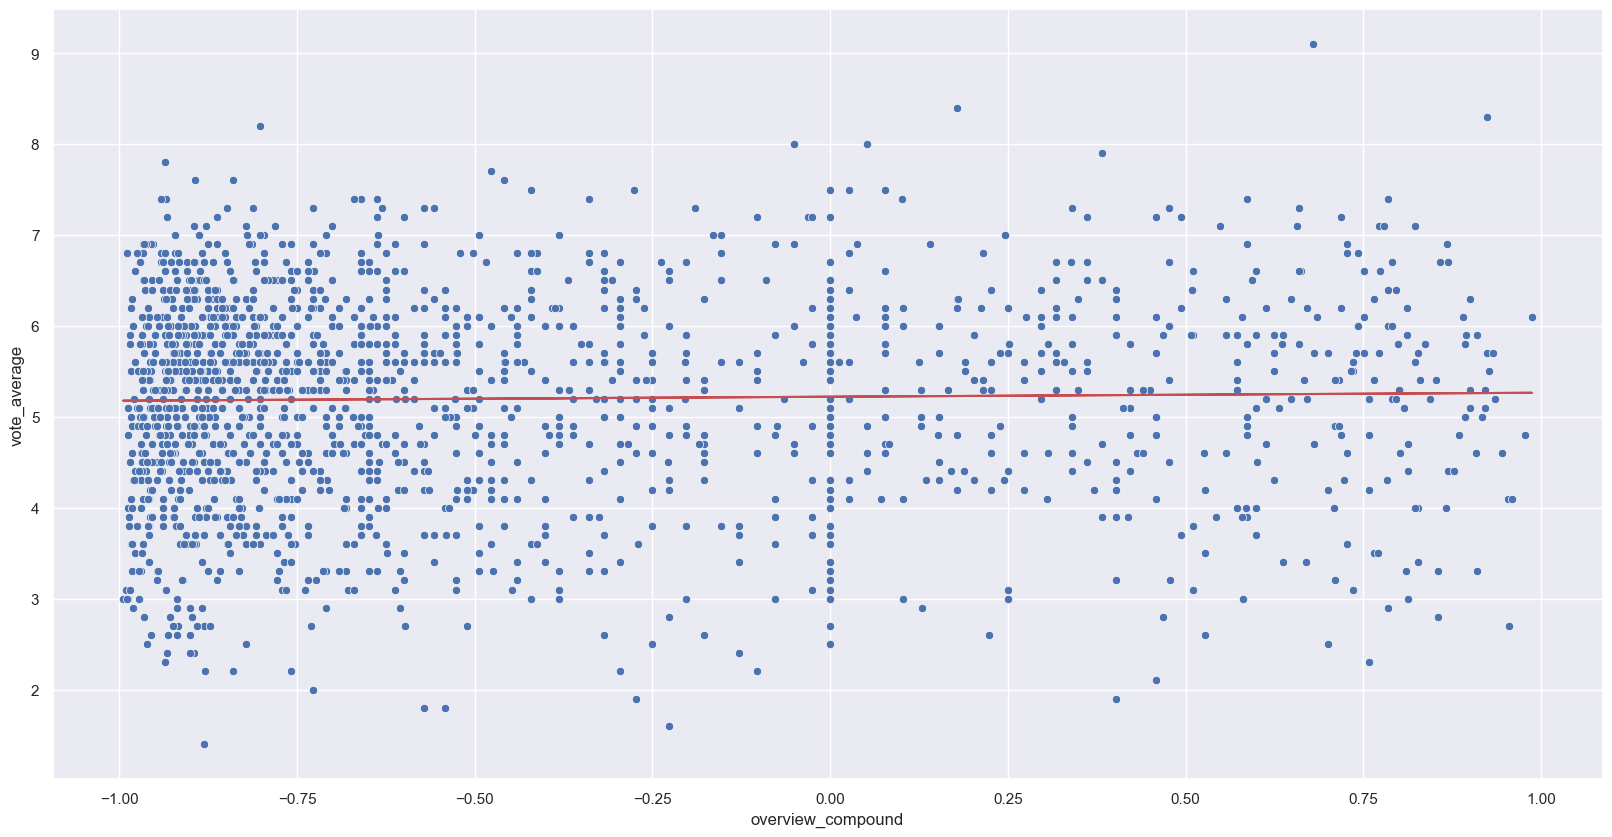

In [51]:
# Ploting a scatterplot of 'overview_compound' vs 'vote_average' of test data
# Also including the 'best fit line'
f = plt.figure(figsize = (20, 10))
X_test_univar = X_test_univar.reset_index().drop('index', axis = 'columns')
y_test_univar = y_test_univar.reset_index().drop('index', axis = 'columns')
scatterplotDF = pd.concat([X_test_univar, y_test_univar], axis = 'columns')
sb.scatterplot(data = scatterplotDF, x = 'overview_compound', y = 'vote_average')
plt.plot(X_test_univar, y_pred_test, 'r')

#### Predicting 'vote_average' with 'tagline_compound' (Train Dataset)

In [52]:
X_train_univar = pd.DataFrame(X_train['tagline_compound'])
y_train_univar = pd.DataFrame(y_train)

linreg.fit(X_train_univar, y_train_univar)

y_pred_train = linreg.predict(X_train_univar)

In [53]:
# Explained Variance, R^2
r2_score(y_train_univar, y_pred_train)

0.0012346250016169735

In [54]:
# Mean Squared Error, MSE
mean_squared_error(y_train_univar, y_pred_train)

1.2850179518644347

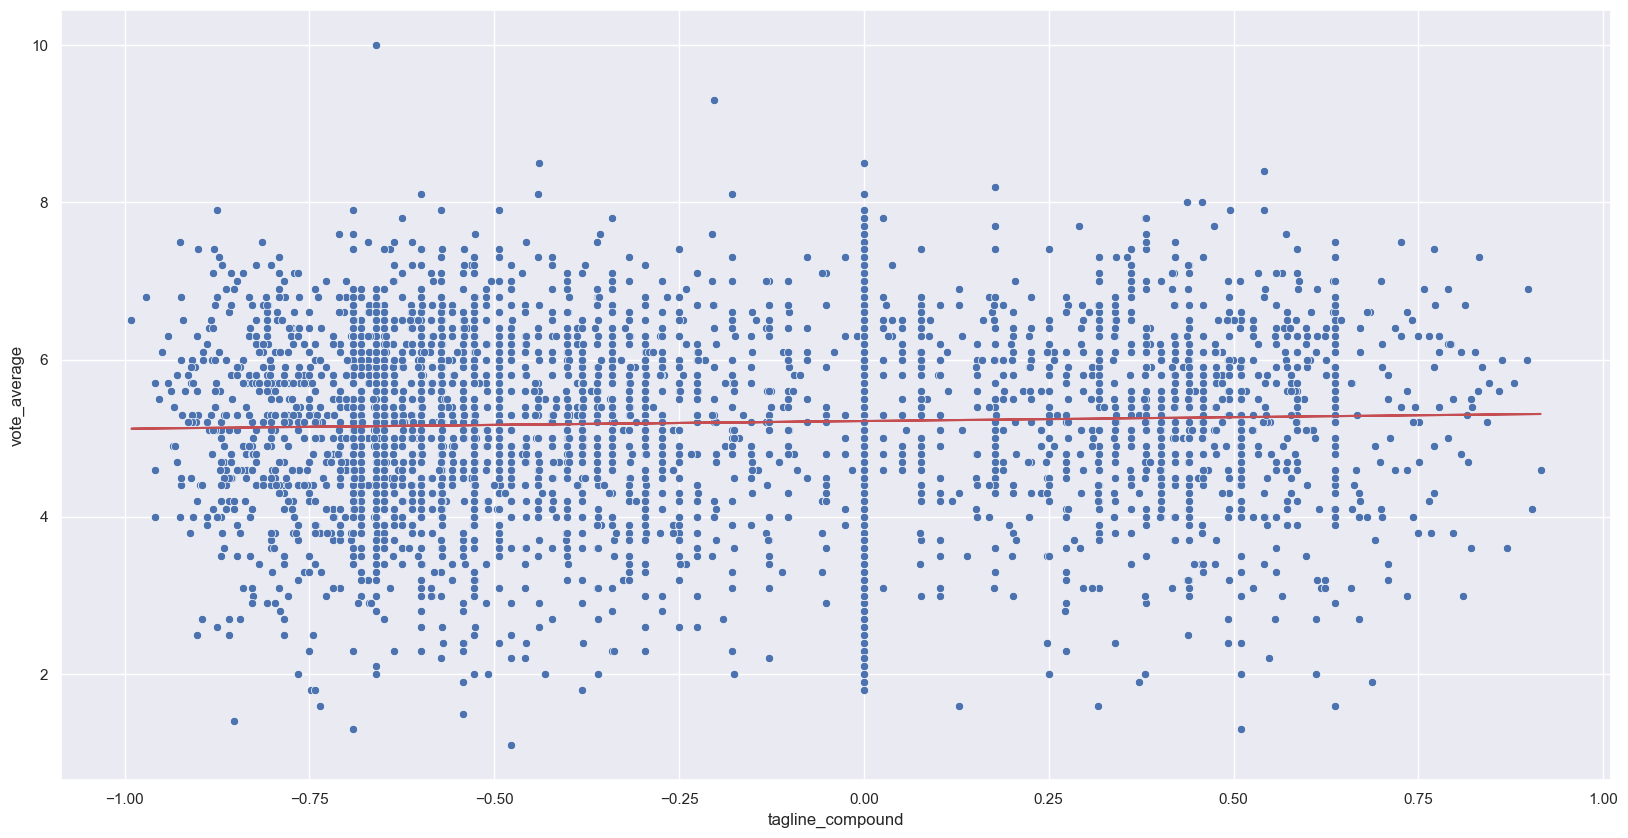

In [55]:
# Ploting a scatterplot of 'tagline_compound' vs 'vote_average' of train data
# Also including the 'best fit line'
f = plt.figure(figsize = (20, 10))
X_train_univar = X_train_univar.reset_index().drop('index', axis = 'columns')
y_train_univar = y_train_univar.reset_index().drop('index', axis = 'columns')
scatterplotDF = pd.concat([X_train_univar, y_train_univar], axis = 'columns')
sb.scatterplot(data = scatterplotDF, x = 'tagline_compound', y = 'vote_average')
plt.plot(X_train_univar, y_pred_train, 'r')

#### Predicting 'vote_average' with 'tagline_compound' (Test Dataset)

In [56]:
# After fitting the model using the 'train' dataset, we can now proceed with our prediction on the 'test' dataset

X_test_univar = pd.DataFrame(X_test['tagline_compound'])
y_test_univar = pd.DataFrame(y_test)

y_pred_test = linreg.predict(X_test_univar)

In [57]:
# Explained Variance, R^2
r2_score(y_test_univar, y_pred_test)

0.0015713367850779258

In [58]:
# Mean Squared Error, MSE
mean_squared_error(y_test_univar, y_pred_test)

1.283858542492267

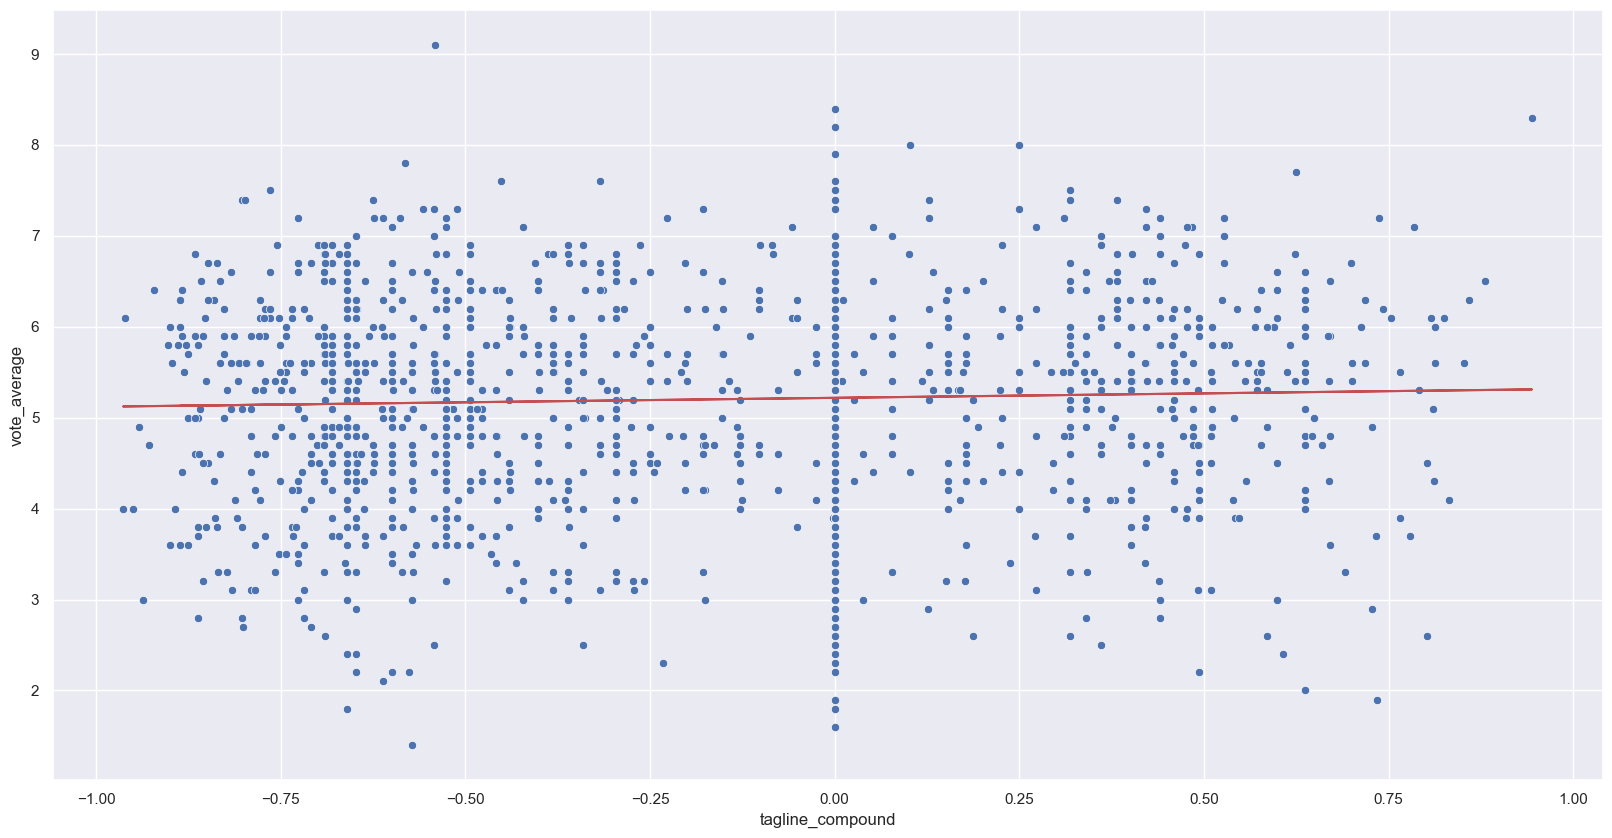

In [59]:
# Ploting a scatterplot of 'tagline_compound' vs 'vote_average' of test data
# Also including the 'best fit line'
f = plt.figure(figsize = (20, 10))
X_test_univar = X_test_univar.reset_index().drop('index', axis = 'columns')
y_test_univar = y_test_univar.reset_index().drop('index', axis = 'columns')
scatterplotDF = pd.concat([X_test_univar, y_test_univar], axis = 'columns')
sb.scatterplot(data = scatterplotDF, x = 'tagline_compound', y = 'vote_average')
plt.plot(X_test_univar, y_pred_test, 'r')

#### Predicting 'vote_average' with both 'overview_compound' and 'tagline_compound' (Train Dataset)

In [60]:
X_train_dualvar = pd.DataFrame(X_train[['overview_compound','tagline_compound']])
y_train_dualvar = pd.DataFrame(y_train)

linreg.fit(X_train_dualvar, y_train_dualvar)

y_pred_train = linreg.predict(X_train_dualvar)

In [61]:
# Explained Variance, R^2
r2_score(y_train_dualvar, y_pred_train)

0.0015443884588223211

In [62]:
# Mean Squared Error, MSE
mean_squared_error(y_train_dualvar, y_pred_train)

1.2846194082091331

#### Predicting 'vote_average' with both 'overview_compound' and 'tagline_compound' (Test Dataset)

In [63]:
# After fitting the model using the 'train' dataset, we can now proceed with our prediction on the 'test' dataset

X_test_dualvar = pd.DataFrame(X_test[['overview_compound','tagline_compound']])
y_test_dualvar = pd.DataFrame(y_test)

y_pred_test = linreg.predict(X_test_dualvar)

In [64]:
# Explained Variance, R^2
r2_score(y_test_dualvar, y_pred_test)

0.0026109397649877186

In [65]:
# Mean Squared Error, MSE
mean_squared_error(y_test_dualvar, y_pred_test)

1.2825217387568255

### XGBoost

In [66]:
# Since Linear Regression does not show a good result in predicting the 'vote_average'
# We will be trying out another non-linear model called 'XGBoost'

# For first time users, remove the '#' infront of '!pip' to install
#!pip install xgboost 
import xgboost as xgb

In [67]:
from xgboost import XGBRegressor
mxgb = XGBRegressor()

#### Predicting 'vote_average' with 'overview_compound' (Train Dataset)

In [68]:
X_train_univar = pd.DataFrame(X_train['overview_compound'])
y_train_univar = pd.DataFrame(y_train)

mxgb.fit(X_train_univar, y_train_univar)

y_pred_train = mxgb.predict(X_train_univar)

In [69]:
# Explained Variance, R^2
r2_score(y_train_univar, y_pred_train)

0.03837062305997685

In [70]:
# Mean Squared Error, MSE
mean_squared_error(y_train_univar, y_pred_train)

1.2372385380401694

#### Predicting 'vote_average' with 'overview_compound' (Test Dataset)

In [56]:
# After fitting the model using the 'train' dataset, we can now proceed with our prediction on the 'test' dataset

X_test_univar = pd.DataFrame(X_test['overview_compound'])
y_test_univar = pd.DataFrame(y_test)

y_pred_test = mxgb.predict(X_test_univar)

In [57]:
# Explained Variance, R^2
r2_score(y_test_univar, y_pred_test)

-0.03586396036897033

In [58]:
# Mean Squared Error, MSE
mean_squared_error(y_test_univar, y_pred_test)

1.2864795296685212

#### Predicting 'vote_average' with 'tagline_compound' (Train Dataset)

In [59]:
X_train_univar = pd.DataFrame(X_train['tagline_compound'])
y_train_univar = pd.DataFrame(y_train)

mxgb.fit(X_train_univar, y_train_univar)

y_pred_train = mxgb.predict(X_train_univar)

In [60]:
# Explained Variance, R^2
r2_score(y_train_univar, y_pred_train)

0.028007204785319262

In [61]:
# Mean Squared Error, MSE
mean_squared_error(y_train_univar, y_pred_train)

1.264855269887394

#### Predicting 'vote_average' with 'tagline_compound' (Test Dataset)

In [62]:
# After fitting the model using the 'train' dataset, we can now proceed with our prediction on the 'test' dataset

X_test_univar = pd.DataFrame(X_test['tagline_compound'])
y_test_univar = pd.DataFrame(y_test)

y_pred_test = mxgb.predict(X_test_univar)

In [63]:
# Explained Variance, R^2
r2_score(y_test_univar, y_pred_test)

-0.02224747763725321

In [64]:
# Mean Squared Error, MSE
mean_squared_error(y_test_univar, y_pred_test)

1.2695686929461014

#### Predicting 'vote_average' with both 'overview_compound' and 'tagline_compound' (Train Dataset)

In [65]:
X_train_dualvar = pd.DataFrame(X_train[['overview_compound','tagline_compound']])
y_train_dualvar = pd.DataFrame(y_train)

mxgb.fit(X_train_dualvar, y_train_dualvar)

y_pred_train = mxgb.predict(X_train_dualvar)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

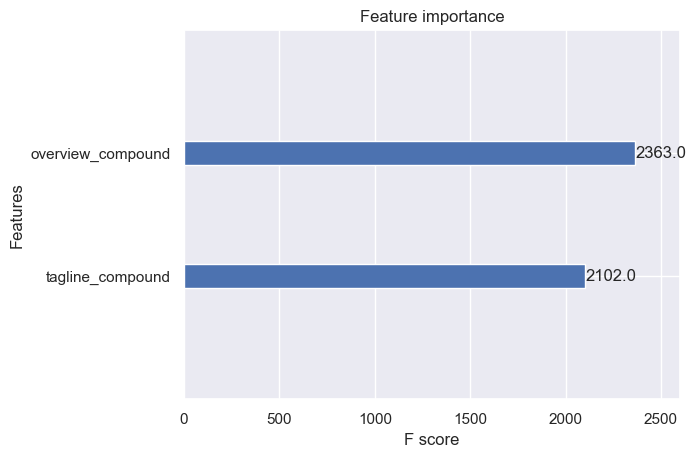

In [66]:
xgb.plot_importance(mxgb, ax = plt.gca())

In [67]:
# Explained Variance, R^2
r2_score(y_train_dualvar, y_pred_train)

0.35976479846542286

In [68]:
# Mean Squared Error, MSE
mean_squared_error(y_train_dualvar, y_pred_train)

0.8331387563933216

#### Predicting 'vote_average' with both 'overview_compound' and 'tagline_compound' (Test Dataset)

In [69]:
# After fitting the model using the 'train' dataset, we can now proceed with our prediction on the 'test' dataset

X_test_dualvar = pd.DataFrame(X_test[['overview_compound','tagline_compound']])
y_test_dualvar = pd.DataFrame(y_test)

y_pred_test = mxgb.predict(X_test_dualvar)

In [70]:
# Explained Variance, R^2
r2_score(y_test_dualvar, y_pred_test)

-0.17965592059276103

In [71]:
# Mean Squared Error, MSE
mean_squared_error(y_test_dualvar, y_pred_test)

1.4650603283410863